# Анализ рынка автомобилей в Казахстане

**Номер телефона для связи**: +7 904 556 58 67

**Телеграм**: @aosipova96

<p></p>

<div style="border:solid black 1px; padding: 20px">

_____
**Описание исходных данных:**
    
Датасет с данными о продажах автомобилей в Казахстане за 2019 год, полученных из официального источника VAG. После перевода из эксель в csv обнаружились множественные проблемы с исходными данными.

**Способ сбора данных:**
    
Агрегация данных от марок.  

**Предобработка:**
    
Данные из xlsx конвертированы в csv.   
_____
**Цель исследования:**

Подготовить данные к анализу, избавиться от ошибок, возникших при сборе статистики и проанализировать рынок.
    
_____
**Задачи исследования:**
    
1. Провести предобработку данных, привести их к единому формату.
2. Проанализировать автомобильный рынок, сделать выводы и дать рекомендации.    
_____
Для достижения цели проекта и выполнения поставленных задач, **разделим исследование на несколько частей:**
    
***Часть 1. Импорт библиотек и чтение файла***

* [Импортируем все необходимые библиотеки;](#chapter_1)
* [Читаем файл и изучаем общую информацию о данных;](#chapter_2)
    
***Часть 2. Предобработка данных***
    
* [Переименовываем столбцы;](#chapter_3)
* [Удаляем ненужные для анализа столбцы;](#chapter_4)    
* [Проверяем наличие явных и неявных дубликатов, анализируем пропуски;](#chapter_5)    
* [Приводим данные в столбцах к нужным типам;](#chapter_6)
    
***Часть 3. Исследовательский анализ***

* [Изучаем числовые столбцы и их распределения, строим гистограммы и боксплоты;](#chapter_7)
* [Изучаем категориальные признаки, строим гистограммы;](#chapter_8)
    
***Часть 4. Анализируем рынок***
    
* [Выделяем топ-10 марок на рынке Казахстана в натуральном и денежном выражении;](#chapter_9)
* [Расчитываем общие продажи всех марок на рынке Казахстана в натуральном и денежном выражении;](#chapter_10)
* [Анализируем общие продажи всех марок помесячно;](#chapter_11)
* [Анализируем общие продажи по категориям - тип топлива, сегмент и класс;](#chapter_12)
* [Анализируем продажи по регионам;](#chapter_13)   
* [Анализируем продажи по дилерам;](#chapter_14)  
* [Определяем самые продаваемые автомобили;](#chapter_15)    
* [Формулируем итоговые выводы исследования.](#chapter_16)   
    
</div>
<p></p>


# Часть 1. Импорт библиотек и чтение файла.

<a id='chapter_1'></a>Для начала импортируем все необходимые библиотеки.

In [ ]:
import pandas as pd # импортируем библиотеку Pandas

import datetime as dt # импортируем библиотеку DateTime

import numpy as np # импортируем библиотеку NumPy

import matplotlib.pyplot as plt # импортируем модуль PyPlot библиотеки Matplotlib

import seaborn as sns # импортируем библиотеку Seaborn

import re # импортируем библиотеку для работы с регулярными выражениями

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator) # импортируем модуль для дополнительных делений на осях

import calendar # импортируем модуль calendar

import matplotlib.colors as mcolors # импортируем модуль colors

<a id='chapter_2'></a>Теперь прочитаем датасет с данными о продажах автомобилей в Казахстане за 2019 год.

In [ ]:
# читаем файл auto_kz_2019

df = pd.read_csv('auto_kz_2019.csv', sep=';', decimal=',')

# выводим основную информацию
df.info()

# устанавливаем отображение всех столбцов
pd.set_option('display.max_columns', None)

# выводим первые пять строк
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт


Видим, что в датасете **39966 строк** и **25 столбцов** - 1 столбец типа *float*, 1 типа *int* и 23 столбца типа *object*, где

* **Год** - год продажи;
* **Месяц** -месяц продажи;
* **Компания** - название дилера;
* **Бренд** - марка автомобиля;
* **Модель** - модель автомобиля;
* **Модификация** - модификация (изменения в каких-либо деталях, дизайне и т.д.);
* **Год выпуска** - год производства автомобиля;
* **Страна производитель** - страна, в которой был собран автомобиль;
* **Вид топлива** - тип топлива в автомобиле;
* **Объем двиг, л** - рабочий объем двигателя;
* **Коробка передач** - тип коробки переключения передач;
* **Тип привода** - тип привода: передний, задний, полный;
* **Сегмент** - класс автомобиля;
* **Регион** - регион продажи;
* **Наименование дилерского центра** - название дилерского центра;
* **Тип клиента** - юридическое или физическое лицо;
* **Форма расчета** - наличный или безналичный;
* **Количество** - количество машин в заказе;
* **Цена, USD** - цена автомобиля;
* **Продажа, USD** - цена заказа итоговая;
* **Область** - область продажи;
* **Сегментация 2013** - сегмент автомобиля (легковой, внедорожный, грузовой и т.д.)
* **Класс 2013** - класс автомобилей (A, B, C и т.д.)
* **Сегментация Eng** - классификация по типу двигателя;
* **Локализация производства** - импортированный или произведенный в стране автомобиль.

Также видим, что в столбцах `Модификация`, `Год выпуска`, `Вид топлива`, `Объём двиг, л`, `Коробка передач`, `Тип привода`, `Сегмент`,  `Тип клиента`, `Форма расчета`, `Количество` есть пропуски - с ними будем разбираться позднее.

<a id='chapter_3'></a>Для более удобной работы и, в соответствии с PEP8, переведем названия столбцов на английский язык и вместо пробелов будем использовать нижнее подчеркивание.

In [ ]:
# создадим список с новыми корректными названиями столбцов
new_columns = ['year','month','company','brand_name','model','modification','year_of_manufacture','manufacturer_country',
               'type_of_fuel', 'engine_capacity', 'transmission','type_of_drive','segment','region','name_of_dealer',
               'client_type','form_of_payments','quantity','price, USD','sale, USD','sales_region', 'segmentation',
               'class','segmentation_eng','localization']

# переименовываем столбцы
df.columns = new_columns

# выводим первые пять строк
df.head()

,year,month,company,brand_name,model,modification,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,segment,region,name_of_dealer,client_type,form_of_payments,quantity,"price, USD","sale, USD",sales_region,segmentation,class,segmentation_eng,localization
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт


<a id='chapter_4'></a>Теперь попробуем разобраться какие столбцы нам пригодятся, а от каких можно избавиться:

Во-первых, у нас в таблице есть информация о дилере (как о компании, имеющей право продавать авто) - в столбце `company` и так же есть информация о наименовании дилерского центра - `name_of_dealer` (как о конкретной точке продаж). Оставим в таблице только информацию о дилере.

Теперь разберемся с классификацией авто - у нас имеется столбец `segment`, `segmentation` и `segmentation_eng`. Выведем уникальные значения этих столбцов.

In [ ]:
# выводим все уникальные значения столбца
df['segmentation'].unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

Здесь все четко - 5 категорий, на которые можно поделить все автомобили в датасете. Посмотрим теперь на столбец `segment`.

In [ ]:
# выводим все уникальные значения столбца
df['segment'].unique()

array(['Легковые автомобили Premium', 'Внедорожники Premium', nan,
       'Легковые автомобили', 'B класс ', 'Среднеразмерные SUV ',
       'Внедорожники ', 'Внедорожники', 'Полноразмерные SUV ',
       'Субкомпактные SUV ', 'салон', 'Легковые автомобили ', 'B',
       'B-SUV', 'C-SUV', 'C', 'D-SUV', 'D', 'MPV', 'LCV', 'городской',
       'малотоннажные', '16+1', 'VAN', 'Ambulance', 'Шасси',
       'Крупнотоннажные', 'среднетоннажные',
       'Промтоварный фургон 4600*2200*2200*40', 'Изотермический фургон',
       'Изотермический фургон 4600*2200*2200',
       'Промтоварный фургон Т25 с б.д.', 'борт', 'Промтоварный фургон',
       'Промтоварный фургон 4600*2200*2200*25',
       'Бортовая платформа с тентом',
       'Изотермический фургон с холодильным оборудованием',
       'Промтоварный фургон Т40', 'Изотермический фургон 5200*2200*2200*',
       'Борт 5200*2200*400', 'Промтоварный фургон Т40 с б.д.',
       'туристический', '43+1', 'Легковой автомобиль', 'внедорожник',
       'пикап'

Видим, что этот столбец, скорее всего, заполнялся вручную. Здесь очень много "разномастной" информации, которая не несет ценности для нашего анализа. Значит, этот столбец можно смело удалять.

Выведем уникальные значения столбца `segmentation_eng` в алфавитном порядке.

In [ ]:
# выводим отсортированные по алфавиту уникальные значения столбца
np.sort(df['segmentation_eng'].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G2', 'K1', 'K2', 'K3', 'K4', 'L1',
       'L2', 'M', 'N', 'O'], dtype=object)

Здесь мы видим наиболее часто встречающуюся классификацию европейской экономической комисии - **A, B, C, D, E, F**. Также видим подкласс группы **G** (автомобили с кузовом типа купе) - **G2** - это купе штучного производства. Есть и подклассы категории **J** (внедорожные автомобили) - **K1, K2, K3, K4**. Так же имеем категории транспортных средств, согласованных в ЕС - это **M, N, O, L1** и **L2**. Если вкратце, то это минивены, грузовики, автобусы и двухколесные транспортные средства. Двухколесных транспортных средств в таблице, согласно ТЗ нет, так что, скорее всего, этот столбец заполнен не совсем корректно.

Из всех столбцов с сегментацией автомобилей оставляем самый удобный и понятный - `segmentation`.

Так же у нас в таблице имеются данные о модификации автомобиля, для дальнейшего анализа он нам не пригодится, поэтому его тоже удалим. Еще удалим столбец, в котором отмечено импортирован автомобиль или произведен локально и столбец с типом оплаты.

In [ ]:
# удаляем столбцы по имени
df = df.drop(columns=['name_of_dealer','segment','segmentation_eng','modification','form_of_payments','localization'])

# выводим первые пять строк
df.head()

,year,month,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class
0,2019,Май,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Физ. Лицо,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс
1,2019,Август,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Юр. Лицо,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс
2,2019,Апрель,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Алматы,Физ. Лицо,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс
3,2019,Июль,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Юр. Лицо,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс
4,2019,Июль,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Физ. Лицо,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс


У нас осталось **19 столбцов**, для удобства можно так же объединить год и месяц продажи. Но сначала нужно перевести названия месяцев в число. Посмотрим, какие месяцы есть в датасете.

In [ ]:
# выводим уникальные значения столбца month
df['month'].unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

Видим, что в датасете представлены данные по продажам авто **с января по сентябрь 2019 года** (т.е. не за весь год, что не совсем соответствует ТЗ). Напишем функцию, которая вместо строкового значения месяца будет возвращать числовое и применим ее к столбцу с месяцем продажи.

In [ ]:
# создаем словарь в котором буквенному обозначению месяца соответствует числовое
month_change = {'Январь':1, 'Февраль':2, 'Март':3, 'Апрель':4, 'Май':5, 'Июнь':6, 'Июль':7,'Август':8, 'Сентябрь':9}

# заменяем значения в столбце с помощью lambda функции
df['month'] = df['month'].apply(lambda x: month_change[x])

# выводим первые пять строк
df.head()

,year,month,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class
0,2019,5,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Физ. Лицо,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс
1,2019,8,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Юр. Лицо,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс
2,2019,4,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Алматы,Физ. Лицо,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс
3,2019,7,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Юр. Лицо,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс
4,2019,7,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Физ. Лицо,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс


Теперь создадим один столбец с датой продажи `date` сложив два значения из столбцов `year` и `month`, затем эти два столбца удалим. Для каждого месяца так же укажем последний день в этом месяце.

In [ ]:
# создаем столбец с номером последнего дня в месяце
df['day'] = df.apply(lambda x: calendar.monthrange(x['year'], x['month'])[1], axis=1)

# складываем значения столбцов и записываем в новый
df['date'] = df['day'].astype(str) + ', ' + df['month'].astype(str) + ', ' + df['year'].astype(str)

# переводим в формат datetime
df['date'] = df['date'].apply(lambda x: dt.datetime.strptime(x, '%d, %m, %Y')).dt.date

# удаляем столбцы year и month
df.drop(columns=['day','year','month'], inplace=True)

# выводим первые пять строк
df.head()

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
0,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Физ. Лицо,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,2019-05-31
1,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Юр. Лицо,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,2019-08-31
2,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Алматы,Физ. Лицо,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,2019-04-30
3,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Юр. Лицо,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,2019-07-31
4,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Физ. Лицо,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,2019-07-31


<a id='chapter_5'></a> Теперь проверим датасет на наличие явных дубликатов, т.е. полностью повторяющихся строк.

In [ ]:
# находим сумму явных дубликатов
df.duplicated().sum()

22321

В датасете **22321** полностью повторяющихся строк. Но, мы не можем сказать наверняка, дубликат это или нет, т.к. на уникальность автомобиля указывает только *VIN-номер*, информации о котором заказчик нам не давал. Да и **более 22 тысяч строк** из 40 тысяч - это больше половины, вряд ли это могут быть дубликаты. Поэтому оставляем все как есть.

Изучим теперь явные дубликаты. Будем последовательно выводить уникальные значения столбцов, чтобы найти ошибки в написании и т.д.

In [ ]:
# выводим уникальные значения столбца company в алфавитном порядке
np.sort(df['company'].unique())

array(['Allur Auto', 'Almaty Motors Premium', 'Astana Motors',
       'Astana Motors ', 'Autokapital', 'Caspian Motors',
       'Daewoo Bus Kazakhstan', 'Eurasia Motor Premium', 'Hino Motors ',
       'Hyundai Com Trans Kazakhstan ', 'MAN Truck & Bus Kazakhstan',
       'MMC RUS', 'Mercur Auto', 'Mercur Autos',
       'Nissan Manufacturing RUS', 'Ravon Motors Kazakstan',
       'Renault Россия', 'Scandinavian Motors', 'Scania Central Asia',
       'Subaru Kazakhstan', 'TERRA MOTORS', 'Toyota Motor Kazakhstan',
       'Volkswagen Group Rus', 'Автодом Motors KST', 'Автокапитал',
       'Автомир ГК', 'Автомир-Центр', 'Автоцентр-Бавария', 'БИПЭК АВТО',
       'Вираж', 'Каспиан Моторс', 'Лифан Моторс Рус', 'ММС Рус',
       'Равон Моторс Казахстан', 'СВС-ТРАНС', 'СемАЗ', 'ТК КАМАЗ',
       'ТОО "Eurasia Motor Zhaik"', 'УзАвто-Казахстан',
       'Хино Моторс Казахстан'], dtype=object)

Просмотрев все названия компаний можно выделить несколько неявных дубликатов - `'Astana Motors'` и `'Astana Motors '`, `'Hino Motors '` и `'Хино Моторс Казахстан'`, `'MMC RUS'` и `'ММС Рус'`, `'Mercur Auto'` и `'Mercur Autos'`, `'Ravon Motors Kazakstan'` и `'Равон Моторс Казахстан'`. Скорее всего, значения в этом столбце заполнялись вручную.

Сначала рассмотрим `'Astana Motors'` и `'Astana Motors '`. Здесь явная ошибка в написании, некоторые названия написаны с пробелом в конце, некоторые - без.

Теперь рассмотрим `'Hino Motors '` и `'Хино Моторс Казахстан'`. В отдельных ячейках выведем строки, у которых в столбце `company` указаны эти два значения.

In [ ]:
# выбираем строки, у которых в столбце company указано "Hino Motors "
df.query('company == "Hino Motors "')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
39326,Hino Motors,Hino,300,2018,Япония,Дизель,4,MT,2WD,Алматы,Юр. Лицо,1.0,45818.0,45818.0,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-09-30
39327,Hino Motors,Hino,300,2019,Япония,Дизель,4,MT,2WD,Алматы,Юр. Лицо,1.0,46778.0,46778.0,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-09-30


In [ ]:
# выбираем строки, у которых в столбце company указано "Хино Моторс Казахстан"
df.query('company == "Хино Моторс Казахстан"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
39291,Хино Моторс Казахстан,Hino,300,2018,Япония,Дизель,4,MT,2WD,Алматы,Юр. Лицо,1.0,58797.000,58797.000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-01-31
39292,Хино Моторс Казахстан,Hino,300,2018,Япония,Дизель,4,MT,2WD,Алматы,Юр. Лицо,8.0,38050.000,304400.000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-01-31
39293,Хино Моторс Казахстан,Hino,300,2018,Япония,Дизель,4,MT,2WD,Алматы,Юр. Лицо,1.0,46505.000,46505.000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-02-28
39294,Хино Моторс Казахстан,Hino,300,2018,Япония,Дизель,4,MT,2WD,Алматы,Юр. Лицо,2.0,35000.000,70000.000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-02-28
39295,Хино Моторс Казахстан,Hino,300,2018,Япония,Дизель,4,МТ,2WD,Алматы,Юр. Лицо,1.0,52940.000,52940.000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-03-31
39296,Хино Моторс Казахстан,Hino,300,2018,Япония,Дизель,4,МТ,2WD,Алматы,Юр. Лицо,1.0,45440.000,45440.000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-03-31
39297,Хино Моторс Казахстан,Hino,300,2018,Япония,Дизель,4,МТ,2WD,Алматы,Юр. Лицо,1.0,41890.000,41890.000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-03-31
39298,Хино Моторс Казахстан,Hino,300,2018,Япония,Дизель,4,МТ,2WD,Алматы,Юр. Лицо,1.0,41890.000,41890.000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-03-31
39299,Хино Моторс Казахстан,Hino,300,2018,Япония,Дизель,4,МТ,2WD,Алматы,Юр. Лицо,1.0,54522.000,54522.000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-03-31
39300,Хино Моторс Казахстан,Hino,300,2018,Япония,Дизель,4,МТ,2WD,Алматы,Юр. Лицо,1.0,54173.000,54173.000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-03-31


Видим, что для `'Hino Motors '` вывелось всего две строки, а для `'Хино Моторс Казахстан'` намного больше, значит, необходимо будет изменить `'Hino Motors '` на `'Хино Моторс Казахстан'`.

Теперь посмотрим строки с `'MMC RUS'` и `'ММС Рус'`.

In [ ]:
# выбираем строки, у которых в столбце company указано "MMC RUS"
df.query('company == "MMC RUS"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
20434,MMC RUS,Mitsubishi,ASX,2018,Япония,Бензин,2,CVT,2WD,Костанай,NaN,1.0,24103.08745,24103.08745,Костанайская область,Внедорожники,Компактные SUV,2019-05-31
20544,MMC RUS,Mitsubishi,Outlander,2019,Российская Федерация,Бензин,2,CVT,4WD,Нур-Султан,NaN,2.0,29320.15447,58640.30894,г.Нур-Султан,Внедорожники,Компактные SUV,2019-05-31


In [ ]:
# выбираем строки, у которых в столбце company указано "MMC Рус"
df.query('company == "ММС Рус"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
20423,ММС Рус,Mitsubishi,ASX,2018,Япония,Бензин,2,CVT,2WD,Нур-Султан,NaN,1.0,24747.14828,24747.14828,г.Нур-Султан,Внедорожники,Компактные SUV,2019-01-31
20424,ММС Рус,Mitsubishi,ASX,2018,Япония,Бензин,2,CVT,2WD,Нур-Султан,NaN,1.0,24825.90026,24825.90026,г.Нур-Султан,Внедорожники,Компактные SUV,2019-02-28
20425,ММС Рус,Mitsubishi,ASX,2018,Япония,Бензин,2,CVT,2WD,Актобе,NaN,1.0,24828.42496,24828.42496,Актюбинская область,Внедорожники,Компактные SUV,2019-02-28
20426,ММС Рус,Mitsubishi,ASX,2018,Япония,Бензин,2,CVT,2WD,Алматы,NaN,1.0,24840.22281,24840.22281,г.Алматы,Внедорожники,Компактные SUV,2019-03-31
20427,ММС Рус,Mitsubishi,ASX,2018,Япония,Бензин,2,CVT,2WD,Алматы,NaN,1.0,26939.04509,26939.04509,г.Алматы,Внедорожники,Компактные SUV,2019-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38933,ММС Рус,Mitsubishi,Eclipse Cross,2019,Япония,Бензин,"1,5",CVT,4WD,Караганда,NaN,1.0,34705.05516,34705.05516,Карагандинская область,Внедорожники,Компактные SUV,2019-08-31
38934,ММС Рус,Mitsubishi,Eclipse Cross,2019,Япония,Бензин,"1,5",CVT,4WD,Нур-Султан,NaN,1.0,34438.19846,34438.19846,г.Нур-Султан,Внедорожники,Компактные SUV,2019-08-31
38935,ММС Рус,Mitsubishi,Eclipse Cross,2019,Япония,Бензин,"1,5",CVT,4WD,Алматы,NaN,1.0,34374.33532,34374.33532,г.Алматы,Внедорожники,Компактные SUV,2019-08-31
38936,ММС Рус,Mitsubishi,Eclipse Cross,2019,Япония,Бензин,"1,5",CVT,4WD,Нур-Султан,NaN,1.0,34579.68858,34579.68858,г.Нур-Султан,Внедорожники,Компактные SUV,2019-09-30


Здесь похожая ситуация - для `'MMC RUS'` всего две строки, а для `'ММС Рус'` - 408. И, по информации из открытых источников, корректное название компании - `'ММС Рус'`. Поэтому необходимо будет изменить `'MMC RUS'` на `'ММС Рус'`.

Разберемся с `'Mercur Auto'` и `'Mercur Autos'`.

In [ ]:
# выбираем строки, у которых в столбце company указано "Mercur Auto"
df.query('company == "Mercur Auto"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
0,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Физ. Лицо,1.0,28115.00000,28115.00000,г.Алматы,Легковые автомобили,C класс,2019-05-31
1,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Юр. Лицо,1.0,32246.99000,32246.99000,г.Алматы,Легковые автомобили,C класс,2019-08-31
2,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Алматы,Физ. Лицо,1.0,32000.00000,32000.00000,г.Алматы,Легковые автомобили,D класс,2019-04-30
3,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Юр. Лицо,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,2019-07-31
4,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,Физ. Лицо,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,2019-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39531,Mercur Auto,Volkswagen,Teramont,2019,Российская Федерация,Бензин,2,AT,4WD,Костанай,Физ. Лицо,1.0,55556.12449,55556.12449,Костанайская область,Внедорожники,Полноразмерные SUV,2019-03-31
39533,Mercur Auto,Volkswagen,Teramont,2018,Российская Федерация,Бензин,2,AT,NaN,Алматы,Юр. Лицо,1.0,52193.79945,52193.79945,г.Алматы,Внедорожники,Полноразмерные SUV,2019-04-30
39534,Mercur Auto,Volkswagen,Teramont,2018,Российская Федерация,Бензин,"3,6",AT,NaN,Алматы,Физ. Лицо,1.0,56462.04554,56462.04554,г.Алматы,Внедорожники,Полноразмерные SUV,2019-04-30
39536,Mercur Auto,Volkswagen,Teramont,2018,США,Бензин,2,8A,4Motion,Атырау,Физ. Лицо,1.0,52103.36125,52103.36125,Атырауская область,Внедорожники,Полноразмерные SUV,2019-05-31


In [ ]:
# выбираем строки, у которых в столбце company указано "Mercur Autos"
df.query('company == "Mercur Autos"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
21903,Mercur Autos,Porsche,Cayenne,2019,Германия,Бензин,3,8 АКПП Tiptronic S,AWD,Алматы,Физ. Лицо,1.0,132599.0,132599.0,г.Алматы,Внедорожники,Полноразмерные SUV,2019-09-30
21904,Mercur Autos,Porsche,Cayenne,2019,Германия,Бензин,3,8 АКПП Tiptronic S,AWD,Алматы,Физ. Лицо,1.0,101133.0,101133.0,г.Алматы,Внедорожники,Полноразмерные SUV,2019-09-30
21905,Mercur Autos,Porsche,Cayenne,2019,Германия,Бензин,3,8 АКПП Tiptronic S,AWD,Алматы,Физ. Лицо,1.0,100277.0,100277.0,г.Алматы,Внедорожники,Полноразмерные SUV,2019-09-30
21928,Mercur Autos,Porsche,Panamera,2019,Германия,Бензин,3,8 АКПП Tiptronic S,AWD,Алматы,Физ. Лицо,1.0,126037.0,126037.0,г.Алматы,Легковые автомобили,F класс,2019-09-30


Здесь тоже, основная часть записей имеет название дилера - `'Mercur Auto'`. Значит, `'Mercur Autos'` изменим на `'Mercur Auto'`.

И, последнее - `'Ravon Motors Kazakstan'` и `'Равон Моторс Казахстан'`.

In [ ]:
# выбираем строки, у которых в столбце company указано "Ravon Motors Kazakstan"
df.query('company == "Ravon Motors Kazakstan"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
23001,Ravon Motors Kazakstan,Ravon,Nexia R3,2019,Республика Казахстан,Бензин,"1,5",MT,2WD,Нур-Султан,Физ. Лицо,1.0,9884.695773,9884.695773,г.Нур-Султан,Легковые автомобили,B класс,2019-09-30
23002,Ravon Motors Kazakstan,Ravon,Nexia R3,2019,Республика Казахстан,Бензин,"1,5",AT,2WD,Нур-Султан,Физ. Лицо,1.0,9884.695773,9884.695773,г.Нур-Султан,Легковые автомобили,B класс,2019-09-30
23003,Ravon Motors Kazakstan,Ravon,Nexia R3,2019,Республика Казахстан,Бензин,"1,5",MT,2WD,Нур-Султан,Физ. Лицо,1.0,9884.695773,9884.695773,г.Нур-Султан,Легковые автомобили,B класс,2019-09-30
23004,Ravon Motors Kazakstan,Ravon,Nexia R3,2019,Республика Казахстан,Бензин,"1,5",AT,2WD,Нур-Султан,Физ. Лицо,1.0,9884.695773,9884.695773,г.Нур-Султан,Легковые автомобили,B класс,2019-09-30
23005,Ravon Motors Kazakstan,Ravon,Nexia R3,2019,Республика Казахстан,Бензин,"1,5",AT,2WD,Нур-Султан,Физ. Лицо,1.0,9884.695773,9884.695773,г.Нур-Султан,Легковые автомобили,B класс,2019-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23718,Ravon Motors Kazakstan,Ravon,R4,2019,Узбекистан,Бензин,"1,5",МT,2WD,Шымкент,Физ. Лицо,1.0,9884.695773,9884.695773,Южно-Казахстанская область,Легковые автомобили,B класс,2019-09-30
23719,Ravon Motors Kazakstan,Ravon,R4,2019,Узбекистан,Бензин,"1,5",МT,2WD,Шымкент,Физ. Лицо,1.0,9884.695773,9884.695773,Южно-Казахстанская область,Легковые автомобили,B класс,2019-09-30
23720,Ravon Motors Kazakstan,Ravon,R4,2019,Узбекистан,Бензин,"1,5",AT,2WD,Шымкент,Физ. Лицо,1.0,9884.695773,9884.695773,Южно-Казахстанская область,Легковые автомобили,B класс,2019-09-30
23721,Ravon Motors Kazakstan,Ravon,R4,2019,Узбекистан,Бензин,"1,5",МT,2WD,Шымкент,Физ. Лицо,1.0,9884.695773,9884.695773,Южно-Казахстанская область,Легковые автомобили,B класс,2019-09-30


In [ ]:
# выбираем строки, у которых в столбце company указано "Равон Моторс Казахстан"
df.query('company == "Равон Моторс Казахстан"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
22081,Равон Моторс Казахстан,Ravon,Nexia R3,2019,Республика Казахстан,Бензин,NaN,NaN,NaN,Павлодар,Физ. Лицо,1.0,10015.243620,10015.243620,Павлодарская область,Легковые автомобили,B класс,2019-06-30
22082,Равон Моторс Казахстан,Ravon,Nexia R3,2019,Республика Казахстан,Бензин,NaN,NaN,NaN,Караганда,Физ. Лицо,1.0,10015.243620,10015.243620,Карагандинская область,Легковые автомобили,B класс,2019-06-30
22083,Равон Моторс Казахстан,Ravon,Nexia R3,2019,Республика Казахстан,Бензин,NaN,NaN,NaN,Костанай,Физ. Лицо,1.0,10015.243620,10015.243620,Костанайская область,Легковые автомобили,B класс,2019-06-30
22084,Равон Моторс Казахстан,Ravon,Nexia R3,2019,Республика Казахстан,Бензин,NaN,NaN,NaN,Актобе,Физ. Лицо,1.0,10015.243620,10015.243620,Актюбинская область,Легковые автомобили,B класс,2019-06-30
22085,Равон Моторс Казахстан,Ravon,Nexia R3,2019,Республика Казахстан,Бензин,NaN,NaN,NaN,Атырау,Физ. Лицо,1.0,10015.243620,10015.243620,Атырауская область,Легковые автомобили,B класс,2019-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23649,Равон Моторс Казахстан,Ravon,R4,2019,Республика Казахстан,Бензин,"1,5",MT,Передний,Шымкент,Физ. Лицо,1.0,9893.925137,9893.925137,Южно-Казахстанская область,Легковые автомобили,B класс,2019-08-31
23650,Равон Моторс Казахстан,Ravon,R4,2019,Республика Казахстан,Бензин,"1,5",MT,Передний,Шымкент,Физ. Лицо,1.0,9893.925137,9893.925137,Южно-Казахстанская область,Легковые автомобили,B класс,2019-08-31
23651,Равон Моторс Казахстан,Ravon,R4,2019,Республика Казахстан,Бензин,"1,5",MT,Передний,Шымкент,Физ. Лицо,1.0,9893.925137,9893.925137,Южно-Казахстанская область,Легковые автомобили,B класс,2019-08-31
23652,Равон Моторс Казахстан,Ravon,R4,2019,Республика Казахстан,Бензин,"1,5",MT,Передний,Шымкент,Физ. Лицо,1.0,9893.925137,9893.925137,Южно-Казахстанская область,Легковые автомобили,B класс,2019-08-31


В данном случае количество строк примерно одинаковое. Оставим одно название - `'Ravon Motors Kazakstan'`.

Для замены значений в столбцах напишем функцию.

In [ ]:
# определяем функцию company_change(),
# которая заменяет значение на корректное
def company_change(x):

    if x == 'Astana Motors ':

        return 'Astana Motors'

    elif x == 'Hino Motors ':

        return 'Хино Моторс Казахстан'

    elif x == 'MMC RUS':

        return 'MMC Рус'

    elif x == 'Mercur Autos':

        return 'Mercur Auto'

    elif x == 'Равон Моторс Казахстан':

        return 'Ravon Motors Kazakstan'

    elif x == 'Hyundai Com Trans Kazakhstan ':

        return 'Hyundai Com Trans Kazakhstan'

    # если значение не подходит ни под одно выше
    else:

        # функция вернет само значение
        return x

Теперь применим получившуюся функцию к столбцу `company`.

In [ ]:
# применяем функцию company_change к столбцу company
df['company'] = df['company'].apply(company_change)

# для проверки снова выводим уникальные значения столбца
np.sort(df['company'].unique())

array(['Allur Auto', 'Almaty Motors Premium', 'Astana Motors',
       'Autokapital', 'Caspian Motors', 'Daewoo Bus Kazakhstan',
       'Eurasia Motor Premium', 'Hyundai Com Trans Kazakhstan',
       'MAN Truck & Bus Kazakhstan', 'MMC Рус', 'Mercur Auto',
       'Nissan Manufacturing RUS', 'Ravon Motors Kazakstan',
       'Renault Россия', 'Scandinavian Motors', 'Scania Central Asia',
       'Subaru Kazakhstan', 'TERRA MOTORS', 'Toyota Motor Kazakhstan',
       'Volkswagen Group Rus', 'Автодом Motors KST', 'Автокапитал',
       'Автомир ГК', 'Автомир-Центр', 'Автоцентр-Бавария', 'БИПЭК АВТО',
       'Вираж', 'Каспиан Моторс', 'Лифан Моторс Рус', 'ММС Рус',
       'СВС-ТРАНС', 'СемАЗ', 'ТК КАМАЗ', 'ТОО "Eurasia Motor Zhaik"',
       'УзАвто-Казахстан', 'Хино Моторс Казахстан'], dtype=object)

Все отлично, здесь от неявных дубликатов избавились. Переходим к столбцу `brand_name`.

In [ ]:
# выводим уникальные названия брендов в алфавитном порядке
np.sort(df['brand_name'].unique())

array(['ANKAI', 'Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Daewoo',
       'Dong Feng', 'Ford', 'Foton', 'GAZ', 'Hino', 'Hyundai',
       'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco', 'Jac',
       'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus', 'Lifan',
       'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks', 'Mini',
       'Mitsubishi', 'Nefaz', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Shacman', 'Skoda', 'Subaru', 'Toyota', 'UAZ',
       'Volkswagen', 'Volvo', 'Yutong', 'Урал'], dtype=object)

Здесь все хорошо, нет неявных дубликатов и ошибок в написании. Скорее всего, этот столбец заполнялся автоматически.

Идем дальше.

In [ ]:
# выводим уникальные название моделей в алфавитном порядке
np.sort(df['model'].unique())

array(['2206', '2217', '2310', '2705', '2752', '3', '3 серия', '300',
       '301', '3151', '3221', '32551', '3302', '3303', '3308', '3309',
       '3741', '3909', '3962', '4308', '4311', '43118', '4320',
       '4320-1951-40', '4320-1951-60', '43253', '43502', '44108', '45141',
       '45142', '45143', '4x4', '5 серия', '500', '5299', '53215',
       '53504', '53605', '54115', '5490', '5557', '58815Z', '6',
       '6 серия', '65111', '65115', '65116', '65117', '6520', '65206',
       '65225', '66052', '6606', '7 серия', '8 серия', '911 Carrera S',
       'A-Class', 'A3', 'A4', 'A6', 'A7', 'A8', 'ASX', 'Accent', 'Actros',
       'Almera', 'Amarok', 'Arkana', 'Aveo', 'BC 095', 'BC 211 MA',
       'BJ1069VDJEA-F1', 'BJ3253DMPKB-AD', 'BS 106 A', 'BS 106 D',
       'BWC6665GA5', 'C-Class', 'C-HR', 'CLA-Class', 'CLS-Class', 'CX-5',
       'CX-9', 'Cabrio', 'Caddy Kasten ', 'Caddy Maxi Kombi', 'Camaro',
       'Camry', 'Captiva', 'Caravelle', 'Cargo', 'Cayenne', 'Cerato',
       'Corolla', '

Здесь тоже все в порядке.

In [ ]:
# выводим уникальные название годов производства в алфавитном порядке
df['year_of_manufacture'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011',
       '2\xa0018', '2\xa0019'], dtype=object)

В этом столбце у нас есть пропуски, а так же 2 неверно закодированных значения - `'2\xa0018'` и `'2\xa0019'`. **\xa0** - это символ неразрывного пробела в кодировке UNICODE. Изменим некорректные значения и заполним пропуски на нули.

In [ ]:
# определяем функцию, которая изменяет некорректные значения
def year_change(x):

    if x == '2\xa0018':

        return '2018'

    elif x == '2\xa0019':

        return '2019'

    else:

        return x

# применяем к столбцу year_of_manufacture
df['year_of_manufacture'] = df['year_of_manufacture'].apply(year_change)

# заполняем пропуски нулями
df['year_of_manufacture'] = df['year_of_manufacture'].fillna(0)

# выводим еще раз уникальные название моделей в алфавитном порядке
df['year_of_manufacture'].unique()

array(['2018', '2017', '2019', 0, '2016', '2014', '2013', '2011'],
      dtype=object)

Рассмотрим столбец `manufacturer_country`.

In [ ]:
# выводим уникальные страны производства в алфавитном порядке
np.sort(df['manufacturer_country'].unique())

array(['UK', 'Австрия', 'Белоруссия', 'Бельгия', 'Венгрия', 'Германия',
       'Испания', 'Китай', 'Корея', 'Нидерланды', 'Польша',
       'Республика Казахстан', 'Российская Федерация', 'США', 'Таиланд',
       'Турция', 'Узбекистан', 'Швеция', 'Япония'], dtype=object)

Неявных дубликатов нет, закодируем названия стран в **alpha3**.

In [ ]:
# создадим словарь и разместим в них названия стран и их кодировку в alpha3
countries = {'UK':'GBR', 'Австрия':'AUT', 'Белоруссия':'BLR', 'Бельгия':'BEL', 'Венгрия':'HUN', 'Германия':'DEU',
             'Испания':'ESP', 'Китай':'CHN', 'Корея':'PRK', 'Нидерланды':'NLD', 'Польша':'POL',
             'Республика Казахстан':'KAZ', 'Российская Федерация':'RUS', 'США':'USA', 'Таиланд':'THA',
             'Турция':'TUR', 'Узбекистан':'UZB', 'Швеция':'SWE', 'Япония':'JPN'}

# через лямбда-функцию переписываем значения в столбце на значения из словаря
df['manufacturer_country'] = df['manufacturer_country'].apply(lambda x: x.replace(x, countries[x]))

# выводим уникальные страны производства в алфавитном порядке
np.sort(df['manufacturer_country'].unique())

array(['AUT', 'BEL', 'BLR', 'CHN', 'DEU', 'ESP', 'GBR', 'HUN', 'JPN',
       'KAZ', 'NLD', 'POL', 'PRK', 'RUS', 'SWE', 'THA', 'TUR', 'USA',
       'UZB'], dtype=object)

готово. Переходим к столбцу `type_of_fuel`.

In [ ]:
# выводим уникальные типы топлива в алфавитном порядке
df['type_of_fuel'].unique()

array(['Бензин', 'Дизель', nan, 'дизель ', 'бензин ', 'гибрид', '2',
       '1,6', '0', 'Электро', 'Электричество'], dtype=object)

Видим, что у нас есть неявные дубликаты в виде Бензин/бензин, Дизель/дизель. Так же в списке типов топлива кроме пропусков, бензина, дизеля или электричества есть цифры '2', '1,6' и '0'. Скорее всего эти данные заполнены по ошибке и они должны быть в столбце `engine_capacity`. Проверим это и выведем строки, у которых в столбце `type_of_fuel` указано '2', '1,6' и '0'.

In [ ]:
# выводим строки, у которых значения в столбц type_of_fuel равно 2, 1,6 или 0
df.query('type_of_fuel in ["2","1,6", "0"]')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
23723,Renault Россия,Renault,Duster,2019,RUS,2,MT,4WD,4WD,Уральск,NaN,1.0,12249.61125,12249.61125,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,2019-01-31
23724,Renault Россия,Renault,Duster,2018,RUS,2,AT,4WD,4WD,Нур-Султан,NaN,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,2019-01-31
23725,Renault Россия,Renault,Duster,2018,RUS,2,AT,4WD,4WD,Нур-Султан,NaN,1.0,12249.61125,12249.61125,г.Нур-Султан,Внедорожники,Субкомпактные SUV,2019-01-31
23726,Renault Россия,Renault,Duster,2018,RUS,2,AT,4WD,4WD,Кызылорда,NaN,1.0,12249.61125,12249.61125,Кызылординская область,Внедорожники,Субкомпактные SUV,2019-01-31
23727,Renault Россия,Renault,Duster,2018,RUS,2,MT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23728,Renault Россия,Renault,Duster,2018,RUS,"1,6",MT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23729,Renault Россия,Renault,Duster,2018,RUS,2,AT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23730,Renault Россия,Renault,Duster,2018,RUS,2,AT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23731,Renault Россия,Renault,Duster,2018,RUS,2,MT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31
23732,Renault Россия,Renault,Duster,2018,RUS,2,MT,4WD,4WD,Караганда,NaN,1.0,12249.61125,12249.61125,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-01-31


Видим, что для строк, в которых значения столбца `type_of_fuel` равно 2 или 1,6 также неверно заполнены столбцы `engine_capacity` и `transmission`. Значения столбца `type_of_fuel` должны быть в `engine_capacity`, а значения из `engine_capacity` в `transmission`. Перенесем их с помощью метода *shift*.

In [ ]:
# выбираем столбцы type_of_fuel, engine_capacity и transmission для строк,
# у которых в столбце type_of_fuel указаны значения "2" и "1,6"
df.loc[df['type_of_fuel'].isin(["2", "1,6"]), ['type_of_fuel', 'engine_capacity','transmission']] = \
df.loc[df['type_of_fuel'].isin(["2", "1,6"]), ['type_of_fuel', 'engine_capacity','transmission']].shift(1, axis=1)
# сдвигаем эти значения вправо по столбцам

Готово. Так же нам необходимо в этом столбце избавиться от неявных дубликатов и нулевых значений. Напишем функцию, которая заменит неявные дубликаты. Стоит заметить, что значение **'0'** в столбце `type_of_fuel` указано для авто **УАЗ 3741**. Нетрудно выяснить, что оно ездит на бензине, поэтому нулевое значение так же изменим на **'Бензин'**.

In [ ]:
# создем список, в котором каждому некорректному значениб будет соответствовать корректное
fuel_replace = {'0':'Бензин', 'Электро':'Электричество', 'бензин ':'Бензин', 'дизель ':'Дизель','гибрид':'Гибрид'}

# с помощью словаря и lambda-функции заменим некорректные значения
df['type_of_fuel'] = df['type_of_fuel'].apply(lambda x: x.replace(x, fuel_replace[x])
                                              if x in fuel_replace
                                              else x)

# выводим уникальные типы топлива
df['type_of_fuel'].unique()

array(['Бензин', 'Дизель', nan, 'Гибрид', 'Электричество'], dtype=object)

Теперь разберемся с пропусками в этом столбце. Посмотрим, сколько у нас пропусков.

In [ ]:
# выводим сумму строк с пропущенными значениями
print(f'Кол-во пропусков в столбце type_of_fuel - {df["type_of_fuel"].isna().sum()}')

print(f'Доля пропусков - {round(df["type_of_fuel"].isna().sum()/df.shape[0]*100, 2)}%')

Кол-во пропусков в столбце type_of_fuel - 3177
Доля пропусков - 7.95%


Доля пропущенных значений в столбце с видом топлива - около **8%**. Т.к. даже у одной модели могут быть модификации с двигателями, работающими на разном топливе, то восстановить эти значения корректно не получится. Поэтому оставим их как есть и заполним какой-нибудь заглушкой.

In [ ]:
# заполняем пропуски строковым нулевым значением
df['type_of_fuel'] = df['type_of_fuel'].fillna('0')

# выводим уникальные типы топлива
df['type_of_fuel'].unique()

array(['Бензин', 'Дизель', '0', 'Гибрид', 'Электричество'], dtype=object)

Отлично - у нас осталось четыре типа топлива - бензин, дизель, электричество и гибрид.

Рассмотрим столбец `engine_capacity`.

In [ ]:
# выводим уникальные значения объемов двигателей
df['engine_capacity'].unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G', '2.8',
       '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h',
       '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,', '6,7L',
       '6,5'], d

Видим, что этот столбец, скорее всего, заполнялся вручную, т.к. стили написания объемов двигателей разные (например **1.8** и **1,8**). У некоторых значений есть приписка **L** (литры) и **KWH** (киловатт-час, для электромобилей), так же есть значения с приписками модификацией двигателей - **MPI, GDI, CRDI VGT** и т.д. Для начала избавимся от разных разделителей десятичный дробей - вместо запятой будем использовать точку. Перед тем, как заменять значения в столбце необходимо так же избавиться от пропусков.

In [ ]:
# выводим сумму строк с пропущенными значениями
print(f'Кол-во пропусков в столбце engine_capacity - {df["engine_capacity"].isna().sum()}')

print(f'Доля пропусков - {round(df["engine_capacity"].isna().sum()/df.shape[0]*100, 2)}%')

Кол-во пропусков в столбце engine_capacity - 4258
Доля пропусков - 10.65%


В этом столбце пропуски составляют более **10%**. Здесь также, как и с типом топлива, возможны разные модификации объемов двигателя для одной модели, поэтому для заполнения пропусков будем использовать "заглушку" - строковое значение **"0"**.

In [ ]:
# заполняем пропуски в столбце строковым значением 0
df['engine_capacity'] = df['engine_capacity'].fillna('0')

# применяем лямбда-функцию к каждому значению в столбце и заменяем , на .
df['engine_capacity'] = df['engine_capacity'].apply(lambda x: x.replace(',', "."))

# еще раз выводим уникальные значения объемов двигателей
df['engine_capacity'].unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '1.4 Turbo', '2.5', '1.6', '0', '2.8', '4.3', '4.3.',
       '1.6 MPI', '2.0 MPI', '2.4 GDI', '2.4 MPI', '2.5 CRDI VGT',
       '2.5 CRDI WGT', '3.9', '7.5', '12.3', '1.6 T-GDI', '2.0 CRDI',
       '2.0', '3.5', '5.6', '5.2', '3.0 L', '5', '1.598', '1.248',
       '1.998', '2.359', '1.999', '3.342', '1.591', '3.47', '1.69',
       '1.774', '2.7 ', '4.6', '1.8', '10.5', '4', '5.5', '12', '12.8',
       '11', '2.2', '1.2', '1.485', '13', '1.33', '#Н/Д', '4.0', '2.4G',
       '2.693', '3.8', '1.2T', '3.6', '7.6', '4.9', '2.0h', '2.9',
       '400 Л.С.', '4.98 L.', '4.98', '88 KWH', '8.4 L.', '6.7L', '6.5'],
      dtype=object)

С помощью регулярных выражений избавимся от всех "приписок" после цифр.

In [ ]:
# перезаписываем значение столбца, применив к нему лямбда-функцию
# которая заменяет символ пробела/любые буквы/знак - на пустую строку
df['engine_capacity'] = df['engine_capacity'].apply(lambda x: re.sub('[ A-z-]', '', x))

# еще раз выводим уникальные значения объемов двигателей
df['engine_capacity'].unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '2.5', '1.6', '0', '2.8', '4.3', '4.3.', '2.0', '3.9',
       '7.5', '12.3', '3.5', '5.6', '5.2', '3.0', '5', '1.598', '1.248',
       '1.998', '2.359', '1.999', '3.342', '1.591', '3.47', '1.69',
       '1.774', '4.6', '1.8', '10.5', '4', '5.5', '12', '12.8', '11',
       '2.2', '1.2', '1.485', '13', '1.33', '#Н/Д', '4.0', '2.693', '3.8',
       '3.6', '7.6', '4.9', '2.9', '400Л.С.', '4.98.', '4.98', '88',
       '8.4.', '6.5'], dtype=object)

Стало намного лучше. Но, так же можно заметить, что у нас есть два некорректных значения - `'#Н/Д'` и `'400Л.С.'`. Выведем строки, содержащие эти значения.

In [ ]:
# выводим строки, содержащие в столбце engine_capacity значения "#Н/Д" и "400Л.С."
df.query('engine_capacity.isin(["#Н/Д", "400Л.С."])')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
31148,Toyota Motor Kazakhstan,Toyota,Corolla,2019,TUR,Бензин,#Н/Д,#Н/Д,#Н/Д,Нур-Султан,Физ. Лицо,1.0,42316.46043,42316.46043,г.Нур-Султан,Легковые автомобили,C класс,2019-02-28
31149,Toyota Motor Kazakhstan,Toyota,Corolla,2019,TUR,Бензин,#Н/Д,#Н/Д,#Н/Д,Нур-Султан,Физ. Лицо,1.0,42316.46043,42316.46043,г.Нур-Султан,Легковые автомобили,C класс,2019-02-28
32670,Toyota Motor Kazakhstan,Toyota,HILUX DC,2019,THA,Бензин,#Н/Д,#Н/Д,#Н/Д,Алматы,Юр. Лицо,1.0,30870.28194,30870.28194,г.Алматы,Пикапы,Pick-ups,2019-04-30
33070,Toyota Motor Kazakhstan,Toyota,HILUX DC,2019,THA,Бензин,#Н/Д,#Н/Д,#Н/Д,Атырау,Физ. Лицо,1.0,27012.45730,27012.45730,Атырауская область,Пикапы,Pick-ups,2019-07-31
39544,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,Электричество,400Л.С.,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,117236.97290,117236.97290,г.Алматы,Внедорожники,Компактные SUV,2019-02-28
39545,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,Электричество,400Л.С.,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,105388.79240,105388.79240,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39546,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,Электричество,400Л.С.,РЕДУКТОР,4WD,Алматы,Юр. Лицо,1.0,120413.27930,120413.27930,г.Алматы,Внедорожники,Компактные SUV,2019-06-30


Значение **400 Л.С.** в столбце `engine_capacity` указано для электромобиля **Jaguar I-Pace** 2019 года. Из открытых источников можно установить, что ёмкость батареи (аналог объема двигателя для авто на ДВС) для этого авто - **90 KWH**. Исправим некорректное значение.

Видим еще значение **#Н/Д** в столбцах `type_of_fuel`, `engine_capacity` и `transmission` для автомобилей Toyota, проданных дилером **Toyota Motor Kazakhstan**. Т.к. мы не можем точно знать автомобили с каким типом топлива, объемом двигателя и типом трансмиссии были проданы, то заменим эти значения на "заглушки".

Еще исправим три значения - **4.3.**, **4.98.**, и **8.4.** - после замены через регулярные выражения остались лишние точки.

In [ ]:
# создаем словарь с текущими значениями и значениями, на которые хотим заменить
values_to_replace = {'400Л.С.':'90',
                     '4.3.':'4.3',
                     '4.98.':'4.98',
                     '8.4.':'8.4'}

# исправляем значение в столбце engine_capacity
df['engine_capacity'] = (df['engine_capacity'].apply(lambda x: x.replace(x, values_to_replace[x])
                                                     if x in values_to_replace
                                                     else x))

# исправляем значение #Н/Д в столбцах
df[['type_of_fuel','engine_capacity','transmission']] = df[['type_of_fuel','engine_capacity','transmission']].apply(
    lambda x: x.replace('#Н/Д', '0'))

# меняем тим значений на float
df['engine_capacity'] = df['engine_capacity'].astype(float)

# еще раз выводим уникальные значения объемов двигателей
df['engine_capacity'].unique()

array([ 1.4  ,  2.   ,  3.   ,  4.4  ,  6.6  ,  1.5  ,  1.596,  2.4  ,
        1.7  , 26.7  , 25.7  , 24.7  , 23.7  , 22.7  , 21.7  , 20.7  ,
       19.7  , 18.7  , 17.7  , 16.7  , 15.7  , 14.7  , 13.7  , 12.7  ,
       11.7  , 10.7  ,  9.7  ,  8.7  ,  7.7  ,  6.7  ,  5.7  ,  4.7  ,
        3.7  ,  2.7  ,  6.2  ,  2.5  ,  1.6  ,  0.   ,  2.8  ,  4.3  ,
        3.9  ,  7.5  , 12.3  ,  3.5  ,  5.6  ,  5.2  ,  5.   ,  1.598,
        1.248,  1.998,  2.359,  1.999,  3.342,  1.591,  3.47 ,  1.69 ,
        1.774,  4.6  ,  1.8  , 10.5  ,  4.   ,  5.5  , 12.   , 12.8  ,
       11.   ,  2.2  ,  1.2  ,  1.485, 13.   ,  1.33 ,  2.693,  3.8  ,
        3.6  ,  7.6  ,  4.9  ,  2.9  , 90.   ,  4.98 , 88.   ,  8.4  ,
        6.5  ])

Видим здесь также подозрительные значения - **2.7, 3.7, 4.7** и так далее до **26.7**. Объемы более 10 л. уже считаются достаточно большими - проверим, что это не ошибка. Выведем строки, в которых значение в столбце `engine_capacity` больше **10 л.**

In [ ]:
# выводим строки для значения engine_capacity > 10
df.query('engine_capacity > 10')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
399,Вираж,Chevrolet,Niva,2019,KAZ,Бензин,26.7,MT,4WD,Костанай,Юр. Лицо,1.0,10536.24452,1.053624e+04,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-30
400,Вираж,Chevrolet,Niva,2019,KAZ,Бензин,25.7,MT,4WD,Атырау,Физ. Лицо,1.0,10536.24452,1.053624e+04,Атырауская область,Внедорожники,Субкомпактные SUV,2019-04-30
401,Вираж,Chevrolet,Niva,2019,KAZ,Бензин,24.7,MT,4WD,Костанай,Юр. Лицо,1.0,10536.24452,1.053624e+04,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-30
402,Вираж,Chevrolet,Niva,2019,KAZ,Бензин,23.7,MT,4WD,Рудный,Физ. Лицо,1.0,10536.24452,1.053624e+04,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-30
403,Вираж,Chevrolet,Niva,2019,KAZ,Бензин,22.7,MT,4WD,Рудный,Юр. Лицо,1.0,10536.24452,1.053624e+04,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-30
404,Вираж,Chevrolet,Niva,2019,KAZ,Бензин,21.7,MT,4WD,Нур-Султан,Физ. Лицо,1.0,10536.24452,1.053624e+04,г.Нур-Султан,Внедорожники,Субкомпактные SUV,2019-04-30
405,Вираж,Chevrolet,Niva,2019,KAZ,Бензин,20.7,MT,4WD,Караганда,Юр. Лицо,1.0,10536.24452,1.053624e+04,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-04-30
406,Вираж,Chevrolet,Niva,2019,KAZ,Бензин,19.7,MT,4WD,Костанай,Физ. Лицо,1.0,10536.24452,1.053624e+04,Костанайская область,Внедорожники,Субкомпактные SUV,2019-04-30
407,Вираж,Chevrolet,Niva,2019,KAZ,Бензин,18.7,MT,4WD,Усть-Каменогорск,Юр. Лицо,1.0,10536.24452,1.053624e+04,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,2019-04-30
408,Вираж,Chevrolet,Niva,2019,KAZ,Бензин,17.7,MT,4WD,Караганда,Физ. Лицо,1.0,10536.24452,1.053624e+04,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-04-30


Сразу заметна какая-то ошибка в данных - автомобили **Niva Chevrolet** имеют объемы от **10.7 л. до 26.7 л.** Скорее всего, остальные "странные" значения относятся тоже к этим авто. Проверим это и выведем все строки для **Niva Chevrolet**.

Остальные значения выглядят правдоподобно, т.к. относятся к большим автобусам и грузовикам.

In [ ]:
# выводим уникальные значения столбцо engine_capacity для модели Niva
df.loc[df['model'] == "Niva",'engine_capacity'].unique()

array([ 1.7, 26.7, 25.7, 24.7, 23.7, 22.7, 21.7, 20.7, 19.7, 18.7, 17.7,
       16.7, 15.7, 14.7, 13.7, 12.7, 11.7, 10.7,  9.7,  8.7,  7.7,  6.7,
        5.7,  4.7,  3.7,  2.7])

Как и предполагалось, выявленные ранее "подозрительные" значения относятся к автомобилю **Niva Chevrolet**. По информации из открытых источников можно выяснить, что **Chevrolet Niva** в **2017-2019 годах** комплектовалась моторами объёмом 1.7 л. Исправим значения на корректные.

In [ ]:
# выбираем строки, у которых в столбце model указано Niva
# и присваем столбцу engine_capacity значение 1.7
df.loc[df['model'] == "Niva",'engine_capacity'] = 1.7

# округляем значения до 1 знака после запятой
df['engine_capacity'] = round(df['engine_capacity'], 1)

# еще раз выводим уникальные значения объемов двигателей
np.sort(df['engine_capacity'].unique())

array([ 0. ,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  2. ,  2.2,  2.4,
        2.5,  2.7,  2.8,  2.9,  3. ,  3.3,  3.5,  3.6,  3.8,  3.9,  4. ,
        4.3,  4.4,  4.6,  4.9,  5. ,  5.2,  5.5,  5.6,  5.7,  6.2,  6.5,
        6.6,  6.7,  7.5,  7.6,  8.4,  8.7, 10.5, 11. , 12. , 12.3, 12.8,
       13. , 88. , 90. ])

С объемами двигателей разобрались. Переходим к столбцу с типом трансмиссии `transmission`.

In [ ]:
# выводим уникальные значения типов трансмиссии
df['transmission'].unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '0', '7 DSG', '7DSG', '6 DSG',
       '6DSG', 'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП', '5М', 'М/T',
       ' 7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР'],
      dtype=object)

В данном столбце так же находим много неявных дубликатов. Из всего многообразия обозначений нам необходимо выделить основные и привести написание этих значений к общему виду.

**S-tronic** - это автоматическая коробка передач от компании Audi. В основу был положен принцип работы механической коробки передач, однако имеется два вала и два сцепления. Практически является аналогом фирменного **DSG** (Direct Shift Gearbox) от компании Volkswagen.

**Tiptronik** - тоже автоматическая коробка передач от компании Porsche. Такая коробка имеет режим ручного переключения передач.

**Steptronic** - то же, что типтроник, но от компании BMW.

**PowerShift S6** - роботизированная АКПП с мокрым двойным сцеплением, представленная компанией Ford.

**7G-TRONIC** и **9G-TRONIC** - автоматическая коробка передач немецкой компании Mercedes-Benz. 7G-TRONIC в 2013 году была заменена на 9G-Tronic.

**DCT** - роботизированная коробка передач с двойным сцеплением.

**AMT** - простая роботизированная коробка переключения передач.

**CVT** - вариатор (бесступенчатая коробка передач).

**PDK** - роботизированная коробка передач с двумя сцеплениями в суперкарах компании Porsche.

По сути, все эти трансмиссии можно считать подвидами автоматической коробки, но для детальности анализа выделим эти модификации в отдельные категории. Все остальные значения относятся либо к автомату, либо к механике. Цифра перед обозначением типа трансмиссии указывает на количество передач. Так же необходимо будет рассмотреть нулевые и пустые значения.

Но, есть еще одно значение **TDI** - аббревиатура от Turbo Diesel Injection - это дизельный силовой агрегат, т.е. тип двигателя, а не тип трансмиссии. Выведем строки, у которых в столбце `transmission` указано это значение.

In [ ]:
# выбираем строки со значением TDI в столбце transmission
df.query('transmission == "TDI"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
39077,Allur Auto,Jac,T6,2019,KAZ,Дизель,2.0,TDI,4WD,Атырау,Юр. Лицо,1.0,21791.24061,21791.24061,Атырауская область,Внедорожники,Компактные SUV,2019-04-30
39078,Allur Auto,Jac,T6,2019,KAZ,Дизель,2.0,TDI,4WD,Алматы,Юр. Лицо,1.0,23686.13110,23686.13110,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39079,Allur Auto,Jac,T6,2019,KAZ,Дизель,2.0,TDI,4WD,Алматы,Юр. Лицо,1.0,23686.13110,23686.13110,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39080,Allur Auto,Jac,T6,2019,KAZ,Дизель,2.0,TDI,4WD,Алматы,Юр. Лицо,1.0,23686.13110,23686.13110,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39081,Allur Auto,Jac,T6,2019,KAZ,Дизель,2.0,TDI,4WD,Алматы,Юр. Лицо,1.0,23686.13110,23686.13110,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39082,Allur Auto,Jac,T6,2019,KAZ,Дизель,2.0,TDI,4WD,Алматы,Юр. Лицо,1.0,23686.13110,23686.13110,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39083,Allur Auto,Jac,T6,2019,KAZ,Дизель,2.0,TDI,4WD,Алматы,Юр. Лицо,1.0,23686.13110,23686.13110,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39084,Allur Auto,Jac,T6,2019,KAZ,Дизель,2.0,TDI,4WD,Алматы,Юр. Лицо,1.0,23686.13110,23686.13110,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39085,Allur Auto,Jac,T6,2019,KAZ,Дизель,2.0,TDI,4WD,Алматы,Юр. Лицо,1.0,23686.13110,23686.13110,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39086,Allur Auto,Jac,T6,2019,KAZ,Дизель,2.0,TDI,4WD,Алматы,Юр. Лицо,1.0,23686.13110,23686.13110,г.Алматы,Внедорожники,Компактные SUV,2019-04-30


Видим, что это значение указано для авто **JAC T6** на дизельном двигателе. Изучив информацию из внешних источников можно установить, что на эти авто устанавливались классические шестиступенчатые механические коробки. Значит, это значение так же отнесем к **M/T**.

Напишем функцию, которая "агрегирует" все имеющиеся значение в столбце.

In [ ]:
# определяем функцию, которая будет искать значение из списков
# и заменять его на корректное
def transmission_change(x):

    if x in ['S-tronic','S-Tronic']:

        return 'S-tronic'

    elif x in ['8 АКПП Tiptronic S']:

        return 'Tiptronic'

    elif x in ['АКПП','АКП','AT','АТ','АT','A/T','А/T']:

        return 'AT'

    elif x in ['4 АТ','4АТ','4AT']:

        return '4AT'

    elif x in ['5 AT','5AT','5АТ']:

        return '5AT'

    elif x in ['6 АТ','6АТ','6AT','6 AT','6A','6А']:

        return '6AT'

    elif x in [' 7 АКП','7АКП','7АТ', '7AT']:

        return '7AT'

    elif x in ['8AT','8 AT','8АТ', '8 АТ','8-ступ АКПП','8','8АКПП','8A']:

        return '8AT'

    elif x in ['12AT','12АТ']:

        return '12AT'

    elif x in ['Мех.','МКПП','МТ','МT','M/T','МКП','М/T', 'TDI']:

        return 'MT'

    elif x in ['5 МТ','5МТ','5MT','5M','5М']:

        return '5MT'

    elif x in ['6 MT','6MT','6 МТ', '6МТ','6M/T']:

        return '6MT'

    elif x in ['CVT','CVT (вариатор)','CVT (вариATор)', 'CVT(вAриATор)']:

        return 'CVT'

    elif x in ['7 АКПП (PDK)', '7 АКПП PDK','8 АКПП (PDK)']:

        return 'PDK'

    elif x in ['7 DCT', '7DCT']:

        return 'DCT'

    elif x in ['6 DSG', '6DSG','7 DSG','7DSG']:

        return 'DSG'

    else:

        return x

In [ ]:
# применяем полученную функцию ко всем значениям столбца
df['transmission'] = df['transmission'].apply(transmission_change)

# выводим уникальные значения типов трансмиссии
df['transmission'].unique()

array(['S-tronic', 'Tiptronic', 'AT', 'Steptronic', '6AT', '5MT', 'MT',
       '8AT', 'Powershift S6', nan, '6MT', '5AT', 'DCT', 'CVT', '4AT',
       'AMT', '7G-TRONIC', '9G-TRONIC', '12AT', '7AT', 'PDK', '0', 'DSG',
       '9AT', 'РЕДУКТОР'], dtype=object)

Рассмотрим теперь строки со значением **РЕДУКТОР** в столбце `transmission`.

In [ ]:
# выводим строки со значением РЕДУКТОР в столбце transmission
df.query('transmission == "РЕДУКТОР"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
39544,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,Электричество,90.0,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,117236.9729,117236.9729,г.Алматы,Внедорожники,Компактные SUV,2019-02-28
39545,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,Электричество,90.0,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,105388.7924,105388.7924,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39546,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,Электричество,90.0,РЕДУКТОР,4WD,Алматы,Юр. Лицо,1.0,120413.2793,120413.2793,г.Алматы,Внедорожники,Компактные SUV,2019-06-30


Это электромобили, они не имеют коробки передач, но, т.к. электродвигатель всё-равно с колёсами связан через шестерёнки, то должна быть понижаюшая передача, раздаточная коробка, межосевые дифференциалы и т.д. Так что здесь все в порядке.

Рассмотрим нулевые значения.

In [ ]:
# выводим строки со пустым значением и с нулевым в столбце transmission
df.query('transmission == "0"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
24997,Renault Россия,Renault,Sandero,2018,RUS,0,1.6,0,0,Атырау,NaN,1.0,12476.89637,12476.89637,Атырауская область,Легковые автомобили,B класс,2019-01-31
25002,Renault Россия,Renault,Sandero,2018,RUS,0,1.6,0,0,Атырау,NaN,1.0,12476.89637,12476.89637,Атырауская область,Легковые автомобили,B класс,2019-01-31
25023,Renault Россия,Renault,Sandero,2018,RUS,0,1.6,0,0,Нур-Султан,NaN,1.0,12476.89637,12476.89637,г.Нур-Султан,Легковые автомобили,B класс,2019-01-31
31148,Toyota Motor Kazakhstan,Toyota,Corolla,2019,TUR,Бензин,0.0,0,#Н/Д,Нур-Султан,Физ. Лицо,1.0,42316.46043,42316.46043,г.Нур-Султан,Легковые автомобили,C класс,2019-02-28
31149,Toyota Motor Kazakhstan,Toyota,Corolla,2019,TUR,Бензин,0.0,0,#Н/Д,Нур-Султан,Физ. Лицо,1.0,42316.46043,42316.46043,г.Нур-Султан,Легковые автомобили,C класс,2019-02-28
32670,Toyota Motor Kazakhstan,Toyota,HILUX DC,2019,THA,Бензин,0.0,0,#Н/Д,Алматы,Юр. Лицо,1.0,30870.28194,30870.28194,г.Алматы,Пикапы,Pick-ups,2019-04-30
33070,Toyota Motor Kazakhstan,Toyota,HILUX DC,2019,THA,Бензин,0.0,0,#Н/Д,Атырау,Физ. Лицо,1.0,27012.45730,27012.45730,Атырауская область,Пикапы,Pick-ups,2019-07-31


Видим, что нулевые значения есть в столбцах `transmission` и `type_of_drive` для авто **Renault Sandero** 2018 года с объемом двигателя 1.6. Но, такие авто выпускались как на механике, так и на автомате, а т.к. точно определить тип трансмиссии мы не можем, то оставим их как есть. И так же заменим пустые значения временно заменим на нули.

In [ ]:
# выводим сумму строк с пропущенными значениями
print(f'Кол-во пропусков в столбце transmission - {df["transmission"].isna().sum()}')

print(f'Доля пропусков - {round(df["transmission"].isna().sum()/df.shape[0]*100, 2)}%')

Кол-во пропусков в столбце transmission - 3255
Доля пропусков - 8.14%


В этом столбце доля пропусков составляет около **8%**.

In [ ]:
# заменяем пропуски на строковое нулевое значение
df['transmission'] = df['transmission'].fillna('0')

Переходим к типам привода.

In [ ]:
# выводим уникальные значения типов привода
df['type_of_drive'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', '#Н/Д', 'полный', '4Motion'],
      dtype=object)

Видим несколько значений, которые также можно разделить на несколько категорий:

**Передний привод** — Front wheel drive (FWD, FF)

**Задний привод** - Rear Wheel Drive (RWD)

**Полный привод** - Four wheel drive (4WD, 4X4, 4Motion, AWD(автоматический полный привод))

Так же есть значения **4X2** (4X2.2) - это двухколесный привод, который передает мощность на задние или передние колеса. Т.е. этот тип привода нельзя отнести ни к одному выше перечисленному. Плюс есть еще **2WD**, где так же 2 ведущих колеса, но без возможности переключения. Вынесем эти значения в отдельную категорию.



In [ ]:
# определим функцию, которая заменит значения из списков
# на нужные нам значения
def drive_change(x):

    if x in ['передний','Передний','FF','Передний (FF)','FWD']:

        return 'FWD'

    elif x in ['Задний','RWD']:

        return 'RWD'

    elif x in ['quattro','Полный','4WD','4 WD','4X4','4х4','4x4','полный','4Motion']:

        return '4WD'

    elif x in ['2 WD', '2WD','4х2.2','4x2','4х2','4X2','AWD']:

        return '2WD'

    else:

        return x

In [ ]:
# применяем полученную функцию к столбцу
df['type_of_drive'] = df['type_of_drive'].apply(drive_change)

# выводим уникальные значения типов привода
df['type_of_drive'].unique()

array(['FWD', '4WD', 'RWD', '2WD', nan, 'Астана', '0', '#Н/Д'],
      dtype=object)

Осталось еще несколько некорректных значений - **'Астана', '0', '#Н/Д'**, а так же пропуски. Заменим все некорректные значения на "заглушки" в виде строкового нулевого значения. Но для начала изучим сколько всего таких значений.

In [ ]:
# выводим сумму строк с пропущенными значениями
print(f'Кол-во пропусков в столбце type_of_drive - {df["type_of_drive"].isna().sum()}')

print(f'Доля пропусков - {round(df["type_of_drive"].isna().sum()/df.shape[0]*100, 2)}%')

Кол-во пропусков в столбце type_of_drive - 4289
Доля пропусков - 10.73%


В столбце с типом привода так же около **10%** пропусков.

In [ ]:
# создаем список значений для замены
list_to_replace = ['#Н/Д','Астана']

# заменяем значения из списка на строковое нулевое
df['type_of_drive'] = df['type_of_drive'].apply(lambda x: x.replace(x, '0')
                                                if x in list_to_replace
                                                else x)

# заменяем пропуски на стровое нулевое
df['type_of_drive'] = df['type_of_drive'].fillna('0')

# выводим уникальные значения типов привода
df['type_of_drive'].unique()

array(['FWD', '4WD', 'RWD', '2WD', '0'], dtype=object)

Рассмотрим столбец с регионом продажи.

In [ ]:
# выводим уникальные значения столбца region
df['region'].unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'ЭКСПОРТ', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

Здесь все в порядке. Перечислены города продаж и также есть значение **"ЭКСПОРТ"**, значит авто было отправлено на продажу в другую страну.

Рассмотрим столбец `client_type`.

In [ ]:
# выводим уникальные значения столбца region
df['client_type'].unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, 'Юр.Лицо', 'физ.лицо', 'юридическое',
       'физическое', 'ФизЛицо', 'ЮрЛицо', 'Корп. клиент'], dtype=object)

Снова множество неявных дубликатов, агрегируем их в две группы - **Юр.лицо** и **Физ.лицо**, пропуски заполним заглушками.

In [ ]:
# определяем функцию, которая заменит значения из списков на одно общее значение
def client_change(x):

    if x in ['Физ. Лицо','физ.лицо','физическое','ФизЛицо','Корп. клиент']:

        return 'Физ.лицо'

    elif x in ['Юр. Лицо','Юр.Лицо','юридическое','ЮрЛицо']:

        return 'Юр.лицо'

    else:

        return x

In [ ]:
# выводим сумму строк с пропущенными значениями
print(f'Кол-во пропусков в столбце client_type - {df["client_type"].isna().sum()}')

print(f'Доля пропусков - {round(df["client_type"].isna().sum()/df.shape[0]*100, 2)}%')

Кол-во пропусков в столбце client_type - 7047
Доля пропусков - 17.63%


В столбце c типом клиентов пока больше всего пропусков - **более 17%**. Но, удалять строки из-за отстутсвия этих значений совсем неправильно, да и для дальнейшего анализа нам это не помешает. Плюс ко всему, логично предположить, что в любом случае физ.лиц будет подавляющее большинство.

In [ ]:
# применяем полученную функцию к столбцу
df['client_type'] = df['client_type'].apply(client_change)

# заполняем пропуски на строковое нулевое значение
df['client_type'] = df['client_type'].fillna('0')

# выводим уникальные значения столбца region
df['client_type'].unique()

array(['Физ.лицо', 'Юр.лицо', '0'], dtype=object)

Идем дальше - рассмотрим теперь столбец `sales_region`.

In [ ]:
# выводим уникальные значения столбца sales_region
df['sales_region'].unique()

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

In [ ]:
# заменяем некорректное значение
df['sales_region'] = df['sales_region'].replace('Экспорт область', 'Экспорт')

Осталось рассмотреть столбец `class`.

In [ ]:
# выводим уникальные значения столбца class
df['class'].unique()

array(['C класс', 'D класс', 'E класс', 'F класс', 'Среднеразмерные SUV',
       'Полноразмерные SUV', 'Спортивные автомобили', 'Компактные SUV',
       'B класс', 'Субкомпактные SUV', 'Большие автобусы',
       'Крупнотоннажные грузовики', 'Микроавтобусы',
       'Малотоннажные грузовики', 'Среднетоннажные грузовики',
       'Полноразмерный Минивэн', 'Средние автобусы', 'Pick-ups',
       'Развозные автомобили', 'A класс', 'Компактвэн'], dtype=object)

Здесь все ок.

<a id='chapter_6'></a> Теперь разберемся с типами данных - изменим их там, где это необходимо. Выведем еще раз общую информацию о таблице.

In [ ]:
# выводим общую информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               39966 non-null  object 
 1   brand_name            39966 non-null  object 
 2   model                 39966 non-null  object 
 3   year_of_manufacture   39966 non-null  object 
 4   manufacturer_country  39966 non-null  object 
 5   type_of_fuel          39966 non-null  object 
 6   engine_capacity       39966 non-null  float64
 7   transmission          39966 non-null  object 
 8   type_of_drive         39966 non-null  object 
 9   region                39966 non-null  object 
 10  client_type           39966 non-null  object 
 11  quantity              39960 non-null  float64
 12  price, USD            39966 non-null  float64
 13  sale, USD             39966 non-null  float64
 14  sales_region          39966 non-null  object 
 15  segmentation       

Год выпуска и количество автомобилей в заказе изменим с *object* на *integer*, вид топлива, тип привода, сегментацию и класс сделаем категорией - *category*.

Видим, что у нас еще остались 6 пропусков в столбце `quantity`, заменим эти значения на единицу.

In [ ]:
# заполняем пропуски на единицу
df['quantity'] = df['quantity'].fillna(1)

# меняем типы данных в столбцах
df = df.astype({'year_of_manufacture':int,
                'quantity':int,
                'type_of_fuel':'category',
                'type_of_drive':'category',
                'segmentation':'category',
                'class':'category'})

<div style="border:solid green 2px; padding:20px">  
    
В ходе проведения предобработки данных изучили и избавились от неявных дубликатов в столбцах `company`, `type_of_fuel`, `engine_capacity`,`transmission`,`type_of_drive`, `engine_capacity` и `client_type`. Пропуски заполнили там, где это возможно, в остальных случаях использовали заглушки. Привели данные в столбцах к нужным типам.  

# Часть 2. Исследовательский анализ

<a id='chapter_7'></a>Изучим подробнее числовые столбцы, их распределения, основные статистические характеристики и т.д.

Выведем основную статистическую информацию столбца `year_of_manufacture`. Не забудем исключить "заглушки", на которые мы заменяли пропуски.

In [ ]:
# выводим основные статистические характеристики столбца year_of_manufacture
# исключаем нулевые значения
df.query('year_of_manufacture != 0')['year_of_manufacture'].describe()

count    39465.000000
mean      2018.750589
std          0.459765
min       2011.000000
25%       2019.000000
50%       2019.000000
75%       2019.000000
max       2019.000000
Name: year_of_manufacture, dtype: float64

Минимальный год выпуска автомобиля в датасете - **2011**. Но, большинство автомобилей были выпущены в **2019 году**.

Построим сводную таблицу и гистограмму по этому столбцу и посмотрим распределения числа авто по годам выпуска.

In [ ]:
# создаем сводную таблицу по столбцу year_of_manufacture
# и считаем кол-во авто в каждый год
years_pivot = df.pivot_table(index='year_of_manufacture',
                             values='model',
                             aggfunc='count').reset_index()

# выводим получившуюся таблицу
years_pivot

,year_of_manufacture,model
0,0,501
1,2011,1
2,2013,1
3,2014,2
4,2016,30
5,2017,324
6,2018,9081
7,2019,30026


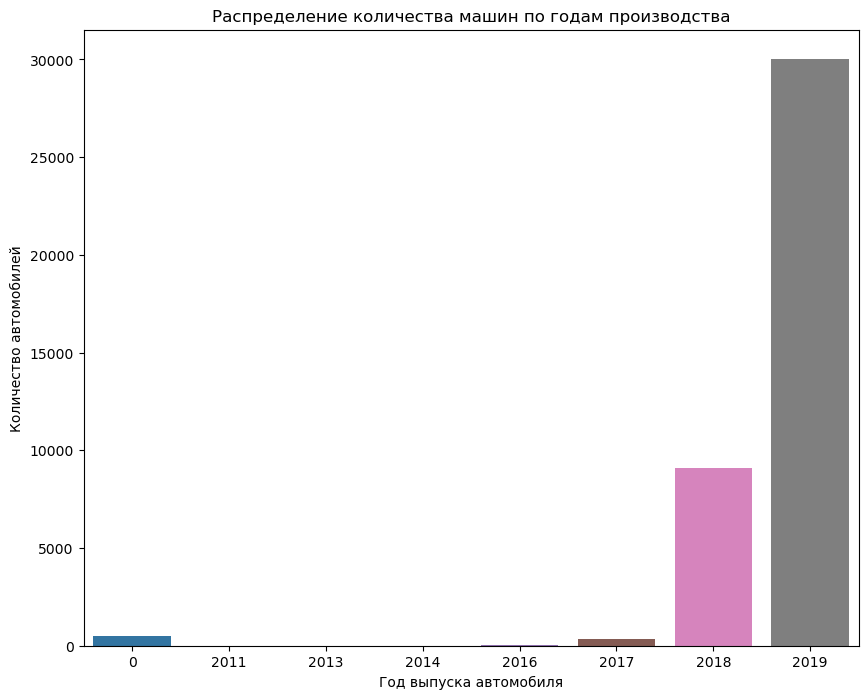

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим гистограмму по столбцу year_of_manufacture
sns.barplot(data=years_pivot , x='year_of_manufacture', y='model')

# задаем название графика
plt.title(label='Распределение количества машин по годам производства')

# задаем подпись оси X
plt.xlabel('Год выпуска автомобиля')

# задаем подпись оси Y
plt.ylabel('Количество автомобилей')

# отражаем получившийся график
plt.show();

По сводной таблицу и гистограме видим, что около **30 тысяч** автомобилей выпущены в **2019 году**. Более чем в три раза меньше (около **10 тысяч**) в **2018 году**. И совсем минимальное количество **до 2018 года**, а так же есть единичные автомобили, выпущенные в **2011, 2013** и **2014 годах**.

Рассмотрим теперь столбец `engine_capacity`.

In [ ]:
# выводим основные статистические характеристики столбца engine_capacity
# исключаем нулевые значения
df.query('engine_capacity != 0')['engine_capacity'].describe()

count    35704.000000
mean         2.318093
std          1.870222
min          1.200000
25%          1.600000
50%          2.000000
75%          2.500000
max         90.000000
Name: engine_capacity, dtype: float64

Минимальное значение - **1.2 л.**, а максимальное - целых **90 л.**! Большинство всех значений (75%) находятся в пределах **2.5 л.**. Построим гистограмму и боксплот для этих значений.

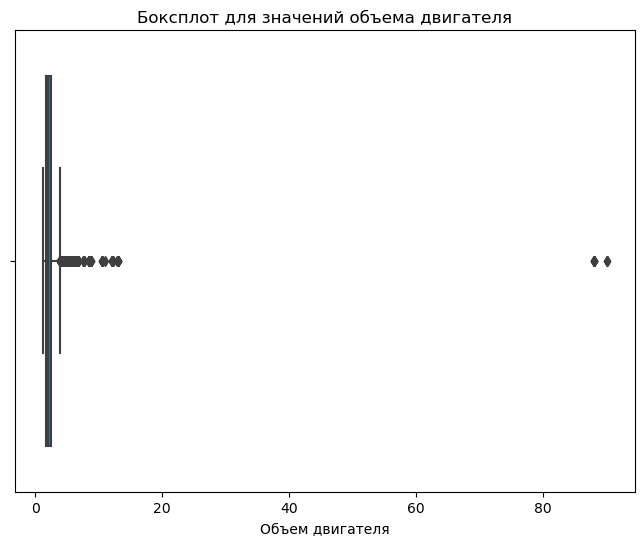

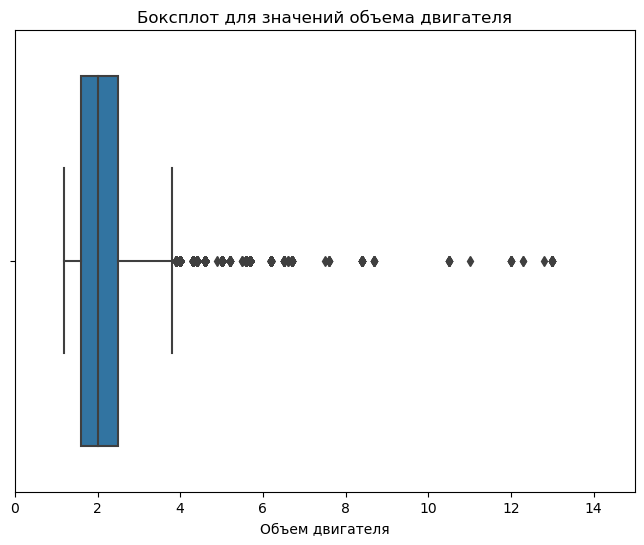

In [ ]:
# задаем размер графика
plt.figure(figsize=(8,6))

# строим боксплот для столбца engine_capacity
# исключив пропуски (нулевые значения)
sns.boxplot(data=df.query('engine_capacity != 0'),
            x='engine_capacity')

# задаем название графика
plt.title(label='Боксплот для значений объема двигателя')

# задаем подпись оси X
plt.xlabel('Объем двигателя')

# отражаем получившийся график
plt.show()

# задаем размер графика
plt.figure(figsize=(8,6))

# строим боксплот для столбца engine_capacity
# исключив пропуски (нулевые значения)
sns.boxplot(data=df.query('engine_capacity != 0'),
            x='engine_capacity')

# задаем ограничение по оси X
plt.xlim(0,15)

# задаем название графика
plt.title(label='Боксплот для значений объема двигателя')

# задаем подпись оси X
plt.xlabel('Объем двигателя')

# отражаем получившийся график
plt.show();

Видим, что по боксплоту предел нормальных значений - **4 л**. Но, так же наблюдаем и очень большие значения - **более 80 л**. Вероятнее всего, это электромобили, у которых вместо объема двигателя в этом столбце указана емкость батареи. Проверим это и выведем эти строки.

In [ ]:
# выбираем строки, у которых значение столбца engine_capacity > 80
df.query('engine_capacity > 80')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
39544,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,Электричество,90.0,РЕДУКТОР,4WD,Алматы,Физ.лицо,1,117236.9729,117236.9729,г.Алматы,Внедорожники,Компактные SUV,2019-02-28
39545,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,Электричество,90.0,РЕДУКТОР,4WD,Алматы,Физ.лицо,1,105388.7924,105388.7924,г.Алматы,Внедорожники,Компактные SUV,2019-04-30
39546,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,Электричество,90.0,РЕДУКТОР,4WD,Алматы,Юр.лицо,1,120413.2793,120413.2793,г.Алматы,Внедорожники,Компактные SUV,2019-06-30
39818,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39819,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39820,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39821,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39822,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39823,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39824,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31


Как и предполагалось, это электромобили, значит, эти значения нельзя считать аномальными.

Рассмотрим так же строки, в которых объем двигателя превышает предел нормальных значений по версии боксплота. Это двигатели, объемами **от 4 до, примерно, 13 л.** Такие значения можно объяснить тем, что в датасете имеются крупнотоннажные грузовики и автобусы, объем двигателя которых как раз может достигать 13 л. Но, т.к. таких значений немного, то они "выпадают" за границу нормальных значений. Для наглядности построим гистограмму для этого столбца (не забудем исключить электромобили).

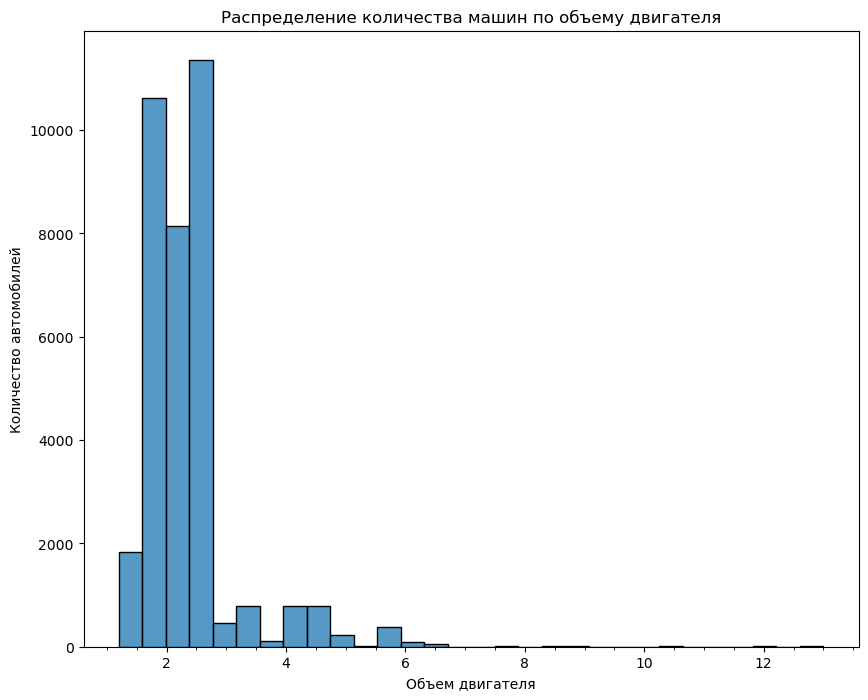

In [ ]:
# задаем фигуру и ось графика
fig, ax = plt.subplots(figsize=(10,8))

# добавляем дополнительные разделители оси x
ax.xaxis.set_minor_locator(AutoMinorLocator())

# строим гистограмму по столбцу engine_capacity
sns.histplot(data=df.query('engine_capacity != 0 and engine_capacity < 80')['engine_capacity'], bins=30)

# задаем название графика
plt.title(label='Распределение количества машин по объему двигателя')

# задаем подпись оси X
plt.xlabel('Объем двигателя')

# задаем подпись оси Y
plt.ylabel('Количество автомобилей')

# отражаем получившийся график
plt.show();

Гистограмма соответствует боксплоту - основная часть автомобилей имеют двигатели, объемом около **1.6-2.4 л.**. Намного меньше авто имеют объем двигателя **от 3 до 6 л**. И совсем минимальное количество имеет больший объем двигателя. Значит, мы можем предположить, что основная часть купленных автомобилей - это все-таки автомобили для частного пользования (легковушки, внедорожники и т.д.)

Логично предположить, что объем двигателя прямо коррелирует с нашей целевой переменной - стоимостью всего заказа. Построим диаграммы рассеяния для стоимости заказа и объема двигателя.

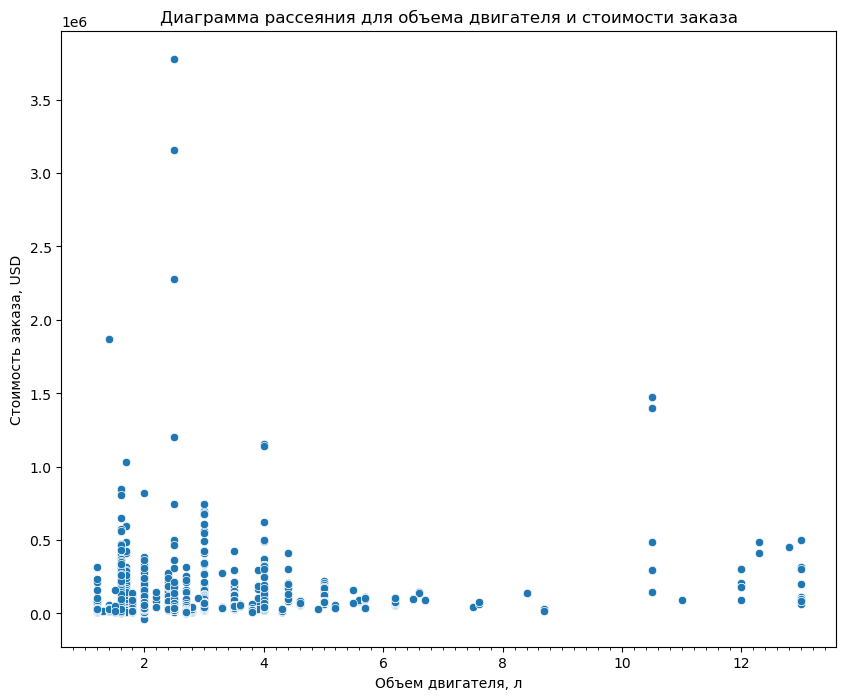

In [ ]:
# задаем фигуру и ось графика
fig, ax = plt.subplots(figsize=(10,8))

# добавляем дополнительные разделители оси x
ax.xaxis.set_minor_locator(MultipleLocator(0.2))

# строим диаграмму рассеяния для столбцов engine_capacity и sale, USD
sns.scatterplot(data=df.query('engine_capacity != 0 and engine_capacity < 80'),
                x='engine_capacity',
                y='sale, USD')

# задаем название графика
plt.title('Диаграмма рассеяния для объема двигателя и стоимости заказа')

# задаем подпись оси X
plt.xlabel('Объем двигателя, л')

# задаем подпись оси Y
plt.ylabel('Стоимость заказа, USD')

# отображаем получившийся график
plt.show();

По диаграмме рассеяния можно отметить, что самые крупные заказы - это автомобили с двигателями **2.5 литра**. Скорее всего это какие-то автобусы. В остальном, явной зависимости между стоимостью заказа и объемом двигателя не наблюдается.  

Рассмотрим теперь столбец с количеством автомобилей в заказе - `quantity`.

In [ ]:
df.query('quantity != 0')['quantity'].describe()

count    39966.000000
mean         1.348146
std          2.372915
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        115.000000
Name: quantity, dtype: float64

Минимальное значение заказа - это **-1** (возврат товара). Максимальное - **115 штук**, среднее около **1.35**. 75% всех значений - это единичные заказы. Стандартное отклонение достаточно большое - **2.37**, что логично, т.к. у нас есть очень большие значения.

Посмотрим сколько заказов у нас было возвращено.

In [ ]:
df.query('quantity < 0')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
25728,БИПЭК АВТО,Skoda,Superb,2019,KAZ,Бензин,2.0,DSG,4WD,Тараз,0,-1,35588.25,-35588.25,Жамбылская область,Легковые автомобили,D класс,2019-08-31


Возвращенных заказов всего один.

Построим боксплот, чтобы посмотреть предел нормальных значений.

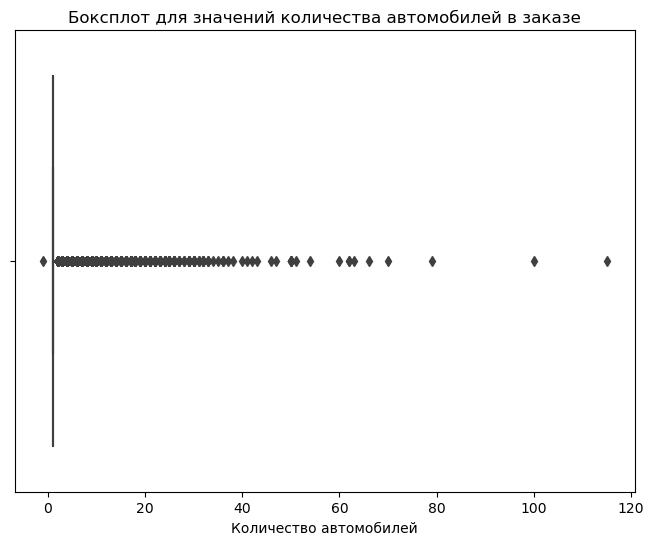

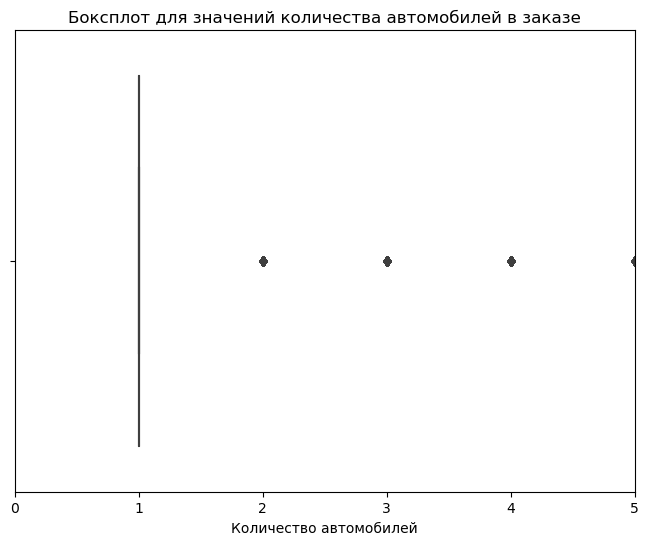

In [ ]:
# задаем размер графика
plt.figure(figsize=(8,6))

# строим боксплот для столбца quantity
# исключив пропуски (нулевые значения)
sns.boxplot(data=df.query('quantity != 0'),
            x='quantity')

# задаем название графика
plt.title(label='Боксплот для значений количества автомобилей в заказе')

# задаем подпись оси X
plt.xlabel('Количество автомобилей')

# отражаем получившийся график
plt.show()

# задаем размер графика
plt.figure(figsize=(8,6))

# строим боксплот для столбца quantity
# исключив пропуски (нулевые значения)
sns.boxplot(data=df.query('quantity != 0'),
            x='quantity')

# задаем ограничение по оси X
plt.xlim(0,5)

# задаем название графика
plt.title(label='Боксплот для значений количества автомобилей в заказе')

# задаем подпись оси X
plt.xlabel('Количество автомобилей')

# отражаем получившийся график
plt.show();

По боксплоту видим, что предел нормальных значений включает в себя только одно значение - **единицу**. Значит, большинство заказов - это обычные покупки физических лиц. Все остальные значения считаются выбросами (от 2-х и до 115 машин в заказе).  Можно предположить, что это заказы от юридических лиц (корпоративные автомобили, автобусы, грузовые автомобили, автомобили для такси и т.д.) либо заказы на экспорт.

Рассмотрим эти "аномальные" заказы подробнее.

In [ ]:
# выведем количество заказов, в которых машин более одной
print(f'Количество заказов с более чем одной машиной в заказе - {df.query("quantity > 1").shape[0]}')

# выведем долю таких заказов
print(f'Доля таких заказов - {round(df.query("quantity > 1").shape[0]/df.shape[0]*100,2)}%')

Количество заказов с более чем одной машиной в заказе - 2756
Доля таких заказов - 6.9%


В датасете около **7% заказов**, в которых больше одной машины. Построим гистограмму для этих заказов.

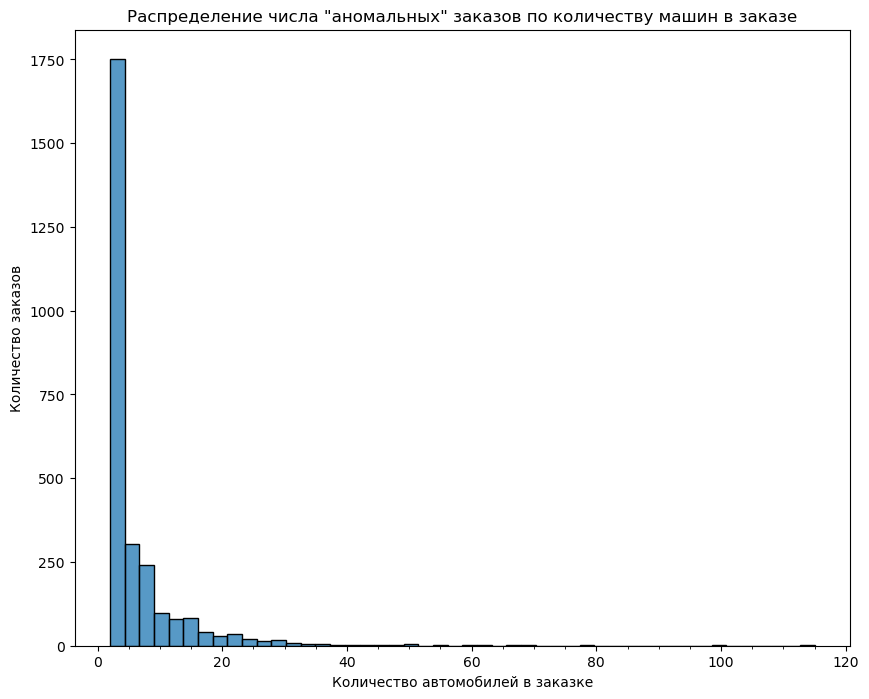

In [ ]:
# задаем фигуру и ось графика
fig, ax = plt.subplots(figsize=(10,8))

# добавляем дополнительные разделители оси x
ax.xaxis.set_minor_locator(MultipleLocator(5))

# строим гистограмму по значениям столбца quantity
sns.histplot(data=df.query('quantity > 1')['quantity'], bins=48)

# задаем название графика
plt.title(label='Распределение числа "аномальных" заказов по количеству машин в заказе')

# задаем подпись оси X
plt.xlabel('Количество автомобилей в заказке')

# задаем подпись оси X
plt.ylabel('Количество заказов')

# отражаем получившийся график
plt.show()

Большинство "аномальных" заказов содержит **от 2-х до 4-х** автомобилей (1750 заказов). Еще меньше заказов содержат **от 4-х до 20-ти** автомобилей и совсем единичные состоят более чем из **40 автомобилей**. Мы предполагали, что заказы с большим количеством авто - это заказы от юридических лиц. Проверим это и создадим сводную таблицу по типам клиентов для заказов, в которых более одной машины.

In [ ]:
# выбираем строки, для которых значение в столбце qunatity > 1
# группируем по столбцу client_type и находим количество строк
df.query('quantity > 1').pivot_table(index='client_type',
                                     values='model',
                                     aggfunc='count')

,model
client_type,
0,2714
Физ.лицо,4
Юр.лицо,38


В данном столбце много пропусков (2714 из 2756 строк для заказов более одной машины). 4 из таких заказов были совершение физическими лицами и 38 заказов - юридическими лицами. Выведем строки с заказами, совершенными физическими лицами.

In [ ]:
# выбираем строки, для которых значение в столбце qunatity > 1
# и значение в столбце client_type равно "Физ.лицо"
df.query('quantity > 1 and client_type == "Физ.лицо"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
23491,Ravon Motors Kazakstan,Ravon,Nexia R3,2019,KAZ,Бензин,0.0,0,0,ЭКСПОРТ,Физ.лицо,2,10015.24362,20030.48725,Экспорт,Легковые автомобили,B класс,2019-06-30
37847,Mercur Auto,Volkswagen,Amarok,2019,DEU,Бензин,2.0,AT,4WD,Костанай,Физ.лицо,2,36520.77261,73041.54521,Костанайская область,Пикапы,Pick-ups,2019-02-28
38570,Mercur Auto,Volkswagen,Transporter Kasten,2019,DEU,Бензин,2.0,DSG,4WD,Алматы,Физ.лицо,7,30698.62045,214890.34310,г.Алматы,Коммерческие автомобили,Микроавтобусы,2019-01-31
39318,Хино Моторс Казахстан,Hino,300,2019,JPN,Дизель,4.0,MT,2WD,Алматы,Физ.лицо,2,45465.00000,90930.00000,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,2019-08-31


**Ravon Nexia R3** в количестве 2-х штук были приобретены физическим лицом на экспорт. **Volkswagen Amarok** в количестве 2х штук также приобретены физическим лицом. Видим также две категории коммерческих автомобилей - **Volkswagen Transporter Kasten** (в количестве 7-ми штук) и **Hino 300** в количестве 2-х штук. Это вполне могут быть покупки индивидуальных предпринимателей (которые считаются физическими лицами) для целей своего бизнеса.

Рассмотрим теперь очень большие заказы, но исключим из них заказы на экспорт.

In [ ]:
# выбираем строки, для которых значение в столбце qunatity > 30
# и значение в столбце region не равно "ЭКСПОРТ"
df.query('quantity > 30 and  region != "ЭКСПОРТ"')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
16015,БИПЭК АВТО,Kia,Cerato,2019,KAZ,Бензин,1.6,6MT,FWD,Караганда,0,37,17500.00000,6.475000e+05,Карагандинская область,Легковые автомобили,C класс,2019-05-31
16299,БИПЭК АВТО,Kia,Rio,2019,KAZ,Бензин,1.6,6AT,FWD,Алматы,0,63,13500.00000,8.505000e+05,г.Алматы,Легковые автомобили,B класс,2019-04-30
16363,БИПЭК АВТО,Kia,Rio,2019,KAZ,Бензин,1.6,6AT,FWD,Алматы,0,60,13500.00000,8.100000e+05,г.Алматы,Легковые автомобили,B класс,2019-09-30
16847,БИПЭК АВТО,Lada,4x4,2019,KAZ,Бензин,1.7,5MT,4WD,Усть-Каменогорск,0,35,9000.00000,3.150000e+05,Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,2019-04-30
16856,БИПЭК АВТО,Lada,4x4,2019,KAZ,Бензин,1.7,5MT,4WD,Кокшетау,0,32,9000.00000,2.880000e+05,Акмолинская область,Внедорожники,Субкомпактные SUV,2019-04-30
16858,БИПЭК АВТО,Lada,4x4,2019,KAZ,Бензин,1.7,5MT,4WD,Караганда,0,54,9000.00000,4.860000e+05,Карагандинская область,Внедорожники,Субкомпактные SUV,2019-04-30
16885,БИПЭК АВТО,Lada,4x4,2019,KAZ,Бензин,1.7,5MT,4WD,Тараз,0,115,9000.00000,1.035000e+06,Жамбылская область,Внедорожники,Субкомпактные SUV,2019-05-31
16913,БИПЭК АВТО,Lada,4x4,2019,KAZ,Бензин,1.7,5MT,4WD,Талдыкорган,0,46,9000.00000,4.140000e+05,Алматинская область,Внедорожники,Субкомпактные SUV,2019-06-30
16934,БИПЭК АВТО,Lada,4x4,2019,KAZ,Бензин,1.7,5MT,4WD,Шымкент,0,32,9000.00000,2.880000e+05,Южно-Казахстанская область,Внедорожники,Субкомпактные SUV,2019-07-31
16943,БИПЭК АВТО,Lada,4x4,2019,KAZ,Бензин,1.7,5MT,4WD,Костанай,0,33,9000.00000,2.970000e+05,Костанайская область,Внедорожники,Субкомпактные SUV,2019-07-31


Видим, что основной "поставщик больших заказов" - это дилер **БИПЕК АВТО** и основная часть крупных заказов - это автомобили **Lada** (Largus, Vesta, Granta и 4х4). Так же в этом списке наблюдаем **Skoda Octavia** и **Volkswagen Polo** - это автомобили, которые часто используют в такси. И в целом, автомобили из крупных заказов - это автомобили в простых комплектациях и с малыми объемами двигателей, так что, скорее всего, такие авто приобретаются для комерческих целей (создание таксопарка, корпоративные авто и т.д.).

Так же можно предположить, что заказы, в которых до 10 машин - это автомобили для перепродажи в других странах, например, в России.

Рассмотрим столбец с ценой автомобилей `price, USD`, выведем основную статистическую информацию. В этом столбце пропусков не было.

In [ ]:
# выводим основные статистические характеристики столбца price, USD
df['price, USD'].describe()

count     39966.000000
mean      28250.157462
std       20005.756629
min        7100.000000
25%       15518.499690
50%       24282.267910
75%       32505.655770
max      328510.970600
Name: price, USD, dtype: float64

Минимальная стоимость авто - **7100\$**, максимальная - **328510\$**, выглядит вполне правдоподобно. Средняя цена - **28250\$**, медианное значение - **24282\$**. Медиана меньше среднего, что логично, т.к. у нас есть достаточно большие значения, которые "смещают" среднее значение вправо. Построим боксплот по этому столбцу.

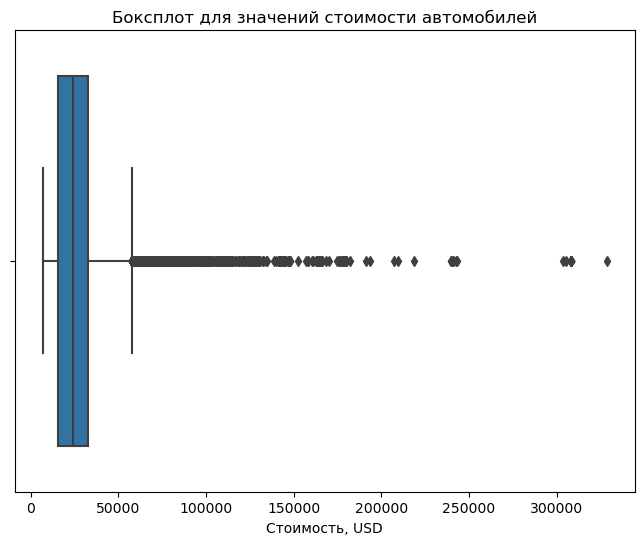

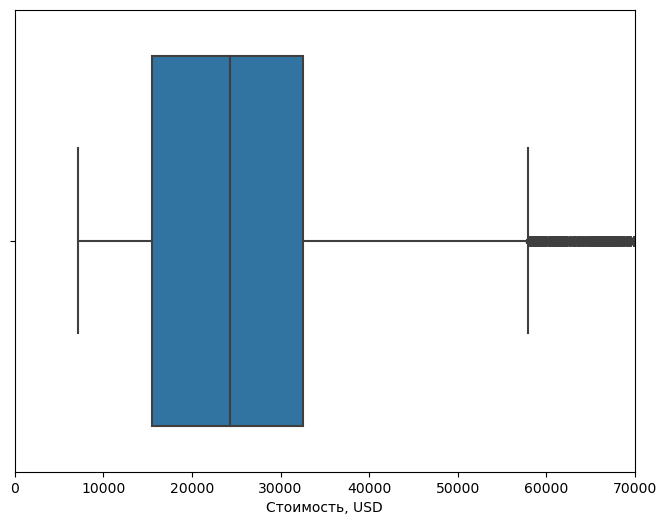

In [ ]:
# задаем размер графика
plt.figure(figsize=(8,6))

# строим боксплот для столбца price, USD
sns.boxplot(data=df, x='price, USD')

# задаем название графика
plt.title(label='Боксплот для значений стоимости автомобилей')

# задаем подпись оси X
plt.xlabel('Стоимость, USD')

# отражаем получившийся график
plt.show()

# задаем размер графика
plt.figure(figsize=(8,6))

# строим боксплот для столбца price, USD
sns.boxplot(data=df, x='price, USD')

# задаем ограничение оси X
plt.xlim(0, 70000)

# задаем подпись оси X
plt.xlabel('Стоимость, USD')

# отражаем получившийся график
plt.show();

По боксплоту предел нормальных значений стоимость составляет около **57000\$**. Так же видим достаточно большое количество выбросов до **250000\$** и единичные выбросы в районе **300000\$**. Такие значения называть аномальными было бы некорректно, т.к. в датасете, скорее всего, присутствуют автомобили класса люкс, а так же автобусы и грузовики, которые априори не могут стоить как легковой автомобиль. Так что избавляться от таких значений не будем, их нужно будет рассмотреть отдельно.

Рассмотрим очень дорогие авто - выведем строки с автомобилями дороже **300000\$**.

In [ ]:
df.query('`price, USD` > 300000')

,company,brand_name,model,year_of_manufacture,manufacturer_country,type_of_fuel,engine_capacity,transmission,type_of_drive,region,client_type,quantity,"price, USD","sale, USD",sales_region,segmentation,class,date
20402,Autokapital,Mercedes-Benz Trucks,Tourismo,2019,TUR,Дизель,12.0,6AT,RWD,Атырау,0,1,305252.0154,305252.0154,Атырауская область,Коммерческие автомобили,Большие автобусы,2019-05-31
20403,Autokapital,Mercedes-Benz Trucks,Tourismo,2019,TUR,Дизель,12.0,6AT,RWD,Атырау,0,1,303650.8783,303650.8783,Атырауская область,Коммерческие автомобили,Большие автобусы,2019-06-30
39818,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39819,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39820,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39821,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39822,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39823,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39824,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31
39825,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,Электричество,88.0,0,2WD,Костанай,Юр.лицо,1,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,2019-07-31


Как мы и предположили, основная часть самых дорогих авто - это китайские электрические автобусы **ANKAI**. А так же три автобуса **Mercedes-Benz Trucks**. Такие автобусы вполне могут стоить заявленных денег.

Построим гистограмму для этого столбца.

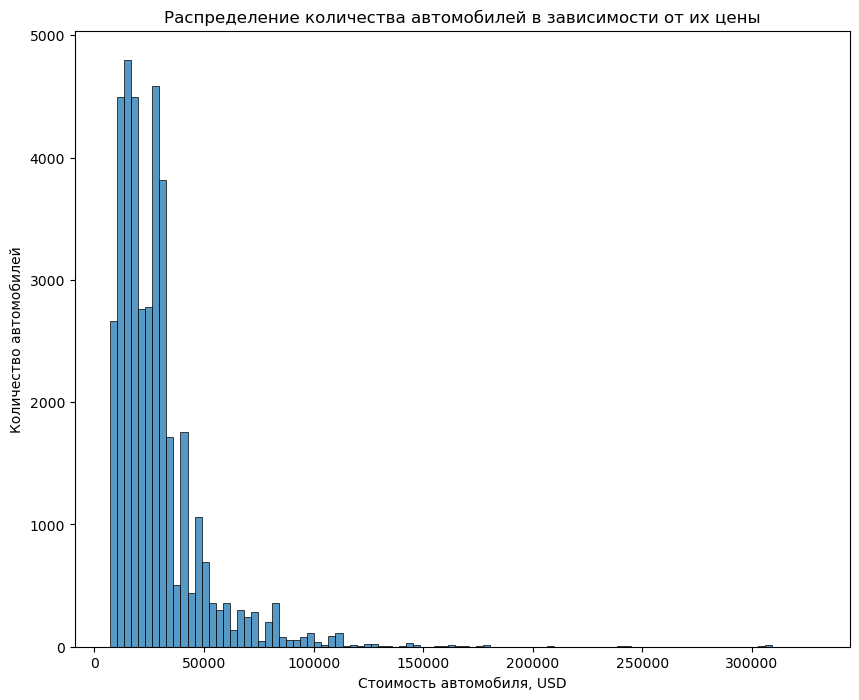

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим гистограмму по столбцу price, USD
sns.histplot(data=df['price, USD'], bins=100)

# задаем название графика
plt.title(label='Распределение количества автомобилей в зависимости от их цены')

# задаем подпись оси X
plt.xlabel('Стоимость автомобиля, USD')

# задаем подпись оси X
plt.ylabel('Количество автомобилей')

# отражаем получившийся график
plt.show()

По гистограмме видим, что основная часть автомобилей стоит **до 50000\$**. Во много раз меньше авто стоимостью **от 50000\$** **до 100000\$**. И совсем минимальное число автомобилей стоит дороже **100000\$**.

Рассмотрим теперь столбец с ценами всего заказа - `sale, USD`. Значение в этом столбце, формируется, скорее всего, автоматически - как произведение столбцов `quantity` и `price, USD`

In [ ]:
# выводим основные статистические характеристики столбца sale, USD
df['sale, USD'].describe()

count    3.996600e+04
mean     3.375767e+04
std      5.070245e+04
min     -3.558825e+04
25%      1.660193e+04
50%      2.624896e+04
75%      3.500000e+04
max      3.778206e+06
Name: sale, USD, dtype: float64

Минимальное значение стоимости заказа отрицательное - **35588.25\$** (т.к. автомобиль вернули). Максимальное значение - **3778206\$**, стандартное отклонение достаточно большое - **50702.45\$** и медиана меньше среднего (медиана - **26248.96\$**, среднее - **33757.67\$**), что говорит о том, что у нас есть очень дорогие заказы.

Построим боксплот.

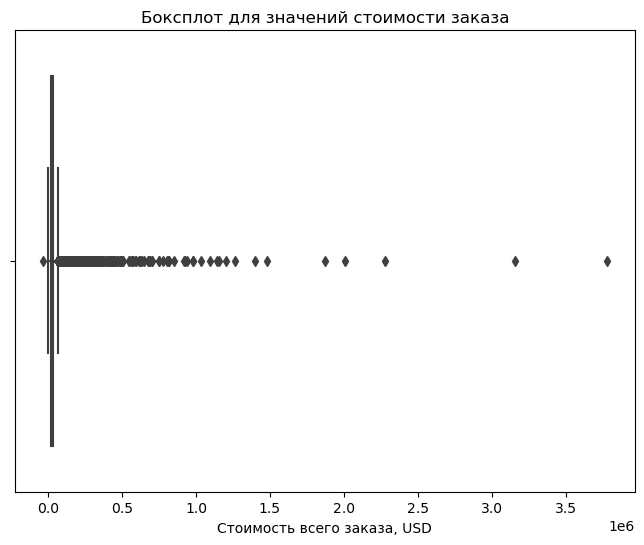

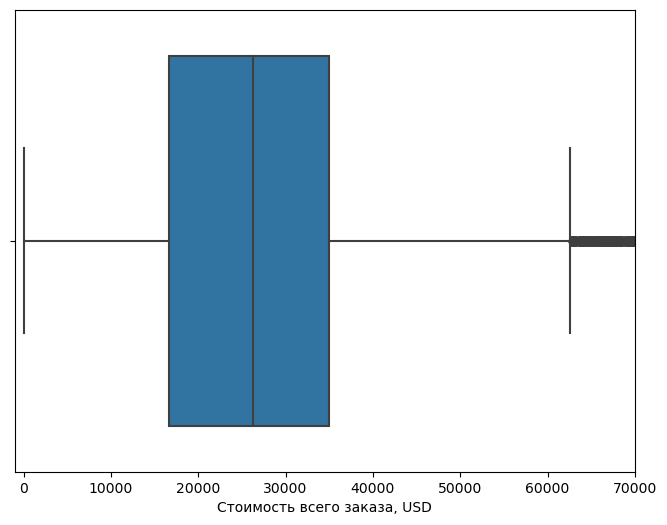

In [ ]:
# задаем размер графика
plt.figure(figsize=(8,6))

# строим боксплот для столбца sale, USD
sns.boxplot(data=df, x='sale, USD')

# задаем название графика
plt.title(label='Боксплот для значений стоимости заказа')

# задаем подпись оси X
plt.xlabel('Стоимость всего заказа, USD')

# выводим получившийся график
plt.show()

# задаем размер графика
plt.figure(figsize=(8,6))

# строим боксплот для столбца sale, USD
sns.boxplot(data=df, x='sale, USD')

# задаем ограничение оси X
plt.xlim(-1000, 70000)

# задаем подпись оси X
plt.xlabel('Стоимость всего заказа, USD')

# выводим получившийся график
plt.show()

Видим, что по боксплоту у нас есть много выбросов - это вполне объяснимо, т.к. у нас есть заказы с большим количеством автомобилей. Предел нормальных значений чуть больше **60000\$** - здесь тоже все выглядит логично, т.к. основная часть заказов в датасете - это единичные покупки автомобилей, а предел нормальных значений по боксплоту для стоимости автомобиля так же в пределах **60000\$**. Построим гистограмму.

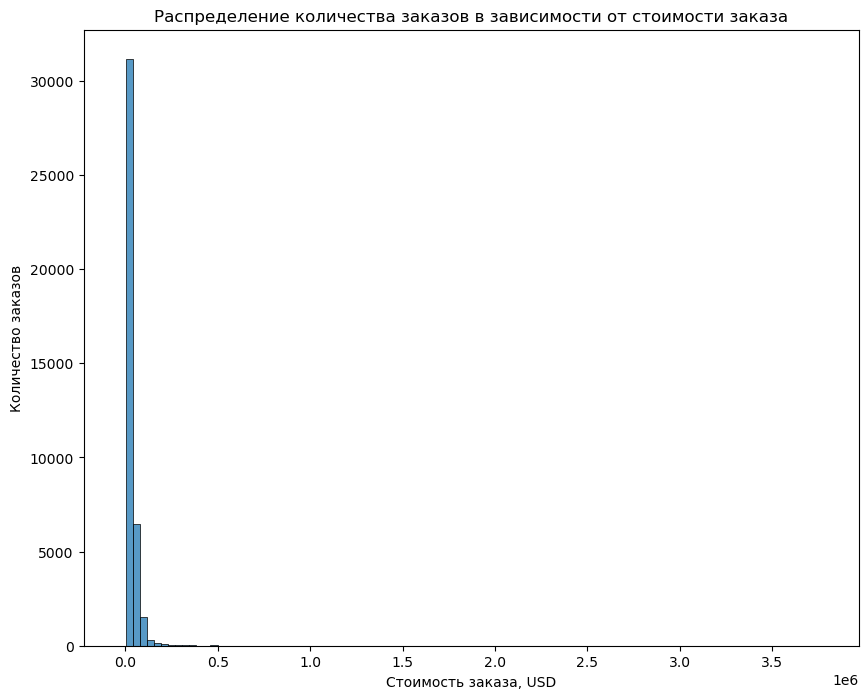

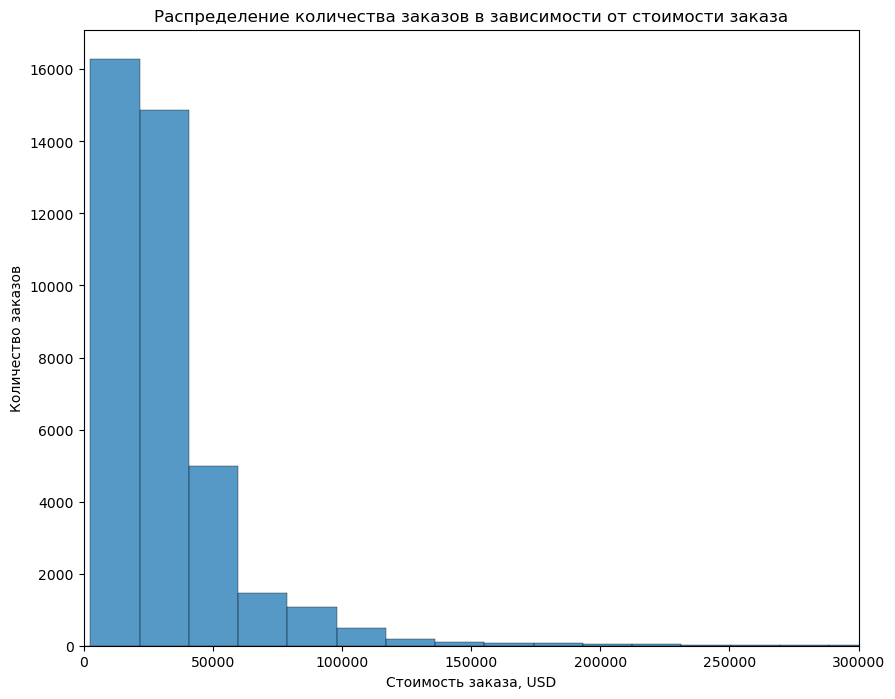

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим гистограмму по столбцу price, USD
sns.histplot(data=df['sale, USD'], bins=100)

# задаем название графика
plt.title(label='Распределение количества заказов в зависимости от стоимости заказа')

# задаем подпись оси X
plt.xlabel('Стоимость заказа, USD')

# задаем подпись оси X
plt.ylabel('Количество заказов')

# отражаем получившийся график
plt.show()

# задаем размер графика
plt.figure(figsize=(10,8))

# строим гистограмму по столбцу price, USD
sns.histplot(data=df['sale, USD'], bins=200)

# задаем название графика
plt.title(label='Распределение количества заказов в зависимости от стоимости заказа')

# задаем ограничение оси X
plt.xlim(0, 3e+05)

# задаем подпись оси X
plt.xlabel('Стоимость заказа, USD')

# задаем подпись оси X
plt.ylabel('Количество заказов')

# отражаем получившийся график
plt.show()

По гистограмме видим, что большая часть заказов стоит до **50000\$**, заказов, которые стоят дороже во много-много раз меньше. Это так же "бьется" с гистограммой по стоимости автомобилей, ведь, как было отмечено ранее, основная часть заказов - это единичные покупки.

<a id='chapter_8'></a>Переходим к анализу категориальных признаков. Начнем со столбца с типом топлива - `type_of_fuel`. Предположительно, больше всего автомобилей будет на бензине, т.к. это самый распространенный тип топлива для легковых автомобилей. Меньше всего будет электромобилей.

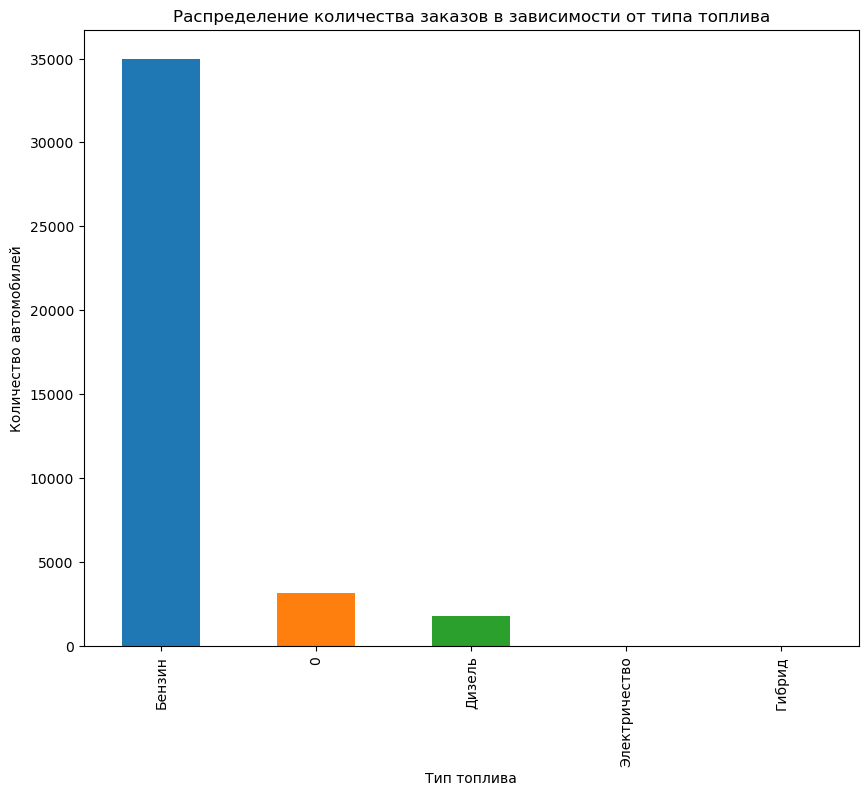

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
df['type_of_fuel'].value_counts().plot(kind='bar', color=mcolors.TABLEAU_COLORS)

# задаем название графика
plt.title(label='Распределение количества заказов в зависимости от типа топлива')

# задаем подпись оси X
plt.xlabel('Тип топлива')

# задаем подпись оси X
plt.ylabel('Количество автомобилей')

# отражаем получившийся график
plt.show();

Как мы и предположили, подавляющая часть автомобилей имеют бензиновый двигатель (**около 35 тысяч** заказов), намного меньше автомобилей (**около 1800** заказов) ездят на дизельном топливе. Всего **13 заказов** на электрические автомобили и **10** гибридных. Нулевые значения - это пропуски в данных, которых даже больше, чем дизельных двигателей.

Рассмотрим теперь такое разделение по количеству автомобилей.

In [ ]:
# создаем сводную таблицу, в которой посчитаем сумму по столбцу quantity
# для каждого уникального значения столбца segmentation
fuel_pivot = df.pivot_table(index='type_of_fuel',
                            values='quantity',
                            aggfunc=sum).reset_index().sort_values('quantity', ascending=False)

fuel_pivot

,type_of_fuel,quantity
1,Бензин,47374
0,0,4419
3,Дизель,2064
4,Электричество,13
2,Гибрид,10


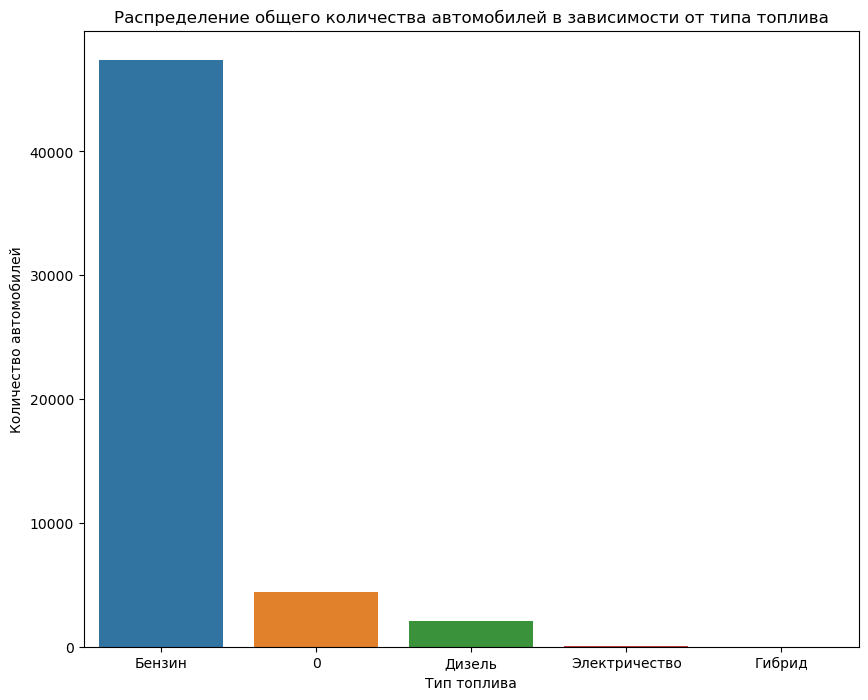

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=fuel_pivot,
            x='type_of_fuel',
            y='quantity',
            order=fuel_pivot.sort_values('quantity', ascending=False).type_of_fuel)

# задаем название графика
plt.title(label='Распределение общего количества автомобилей в зависимости от типа топлива')

# задаем подпись оси X
plt.xlabel('Тип топлива')

# задаем подпись оси X
plt.ylabel('Количество автомобилей')

# отражаем получившийся график
plt.show();

Рассмотрев разбивку по типам топлива не по количеству заказов, а по общему количеству автомобилей, видим, что бензиновые двигатели преобладают, значит, большие заказы были на автомобили на бензиновых двигателях.

Рассмотрим теперь тип привода - `type_of_drive`. Скорее всего, большинство автомобилей будут иметь полный привод (**4WD**) или передний (**FWD**), т.к. в настоящее время это самые распространенные типы привода.

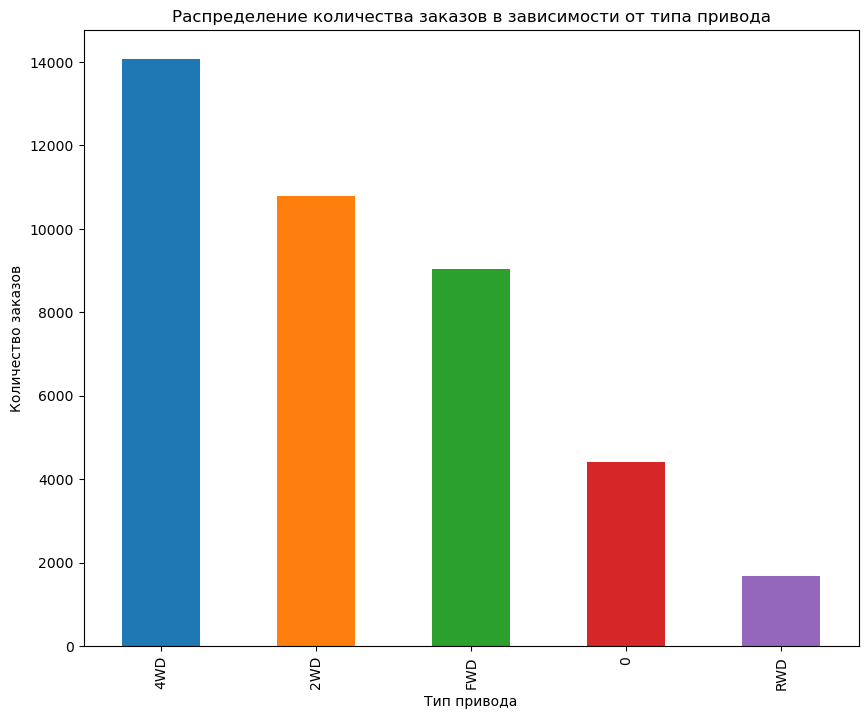

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
df['type_of_drive'].value_counts().plot(kind='bar', color=mcolors.TABLEAU_COLORS)

# задаем название графика
plt.title(label='Распределение количества заказов в зависимости от типа привода')

# задаем подпись оси X
plt.xlabel('Тип привода')

# задаем подпись оси X
plt.ylabel('Количество заказов')

# отражаем получившийся график
plt.show();

Как мы и предполагали, больше всего автомобилей (**около 14000** заказов) имеют полный привод. **Около 9000** заказов - это автомобили с передним приводом. Задний привод имеют меньшинство (**около 2000** заказов). Однако, стоит отметить, что у нас большое количество автомобилей (**больше 10000** заказов) имеют тип привода, который мы обозначили как **2WD**. В эту категорию мы отнесли приводы с двумя ведущими колесами, но неизвестно какими именно (передними или задними), а так же двухколесные приводы с возможностью переключения на перед или зад. Поэтому, если бы мы достоверно могли определить какие колеса ведущие, ситуация могла быть немного другой (например, количество авто с полным и передним приводом могло быть примерно одинаковым или даже передний может перевесить полный).

Плюс ко всему, мы считаем количество заказов, а не количество автомобилей. Рассмотрим типы привода по общему количеству автомобилей.

In [ ]:
# создаем сводную таблицу, в которой посчитаем сумму по столбцу quantity
# для каждого уникального значения столбца segmentation
drive_pivot = df.pivot_table(index='type_of_drive',
                             values='quantity',
                             aggfunc=sum).reset_index()

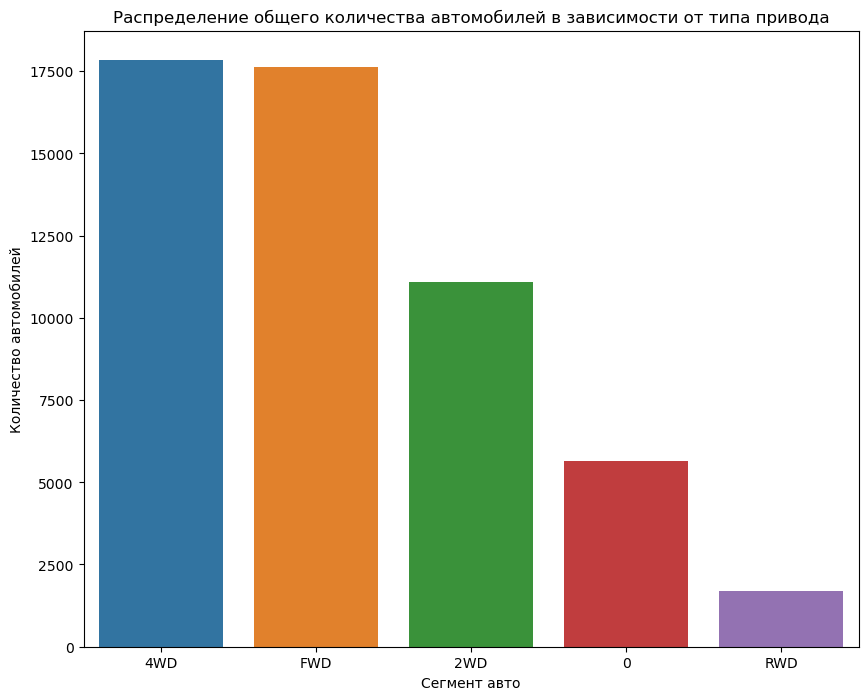

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=drive_pivot,
            x='type_of_drive',
            y='quantity', orient='v',
            order=drive_pivot.sort_values('quantity',ascending=False).type_of_drive)

# задаем название графика
plt.title(label='Распределение общего количества автомобилей в зависимости от типа привода')

# задаем подпись оси X
plt.xlabel('Сегмент авто')

# задаем подпись оси X
plt.ylabel('Количество автомобилей')

# отражаем получившийся график
plt.show();

Рассмотрев типы привода по общему количеству приобретенных автомобилей, видим, что полный и передний привод "выровнялись". Значит, в больших заказах есть много переднеприводных автомобилей.

Теперь рассмотрим как распределяются авто по сегментам. Предположительно, большинство купленных автомобилей - это легковые автомобили. Проверим это и построим столбчатый график.

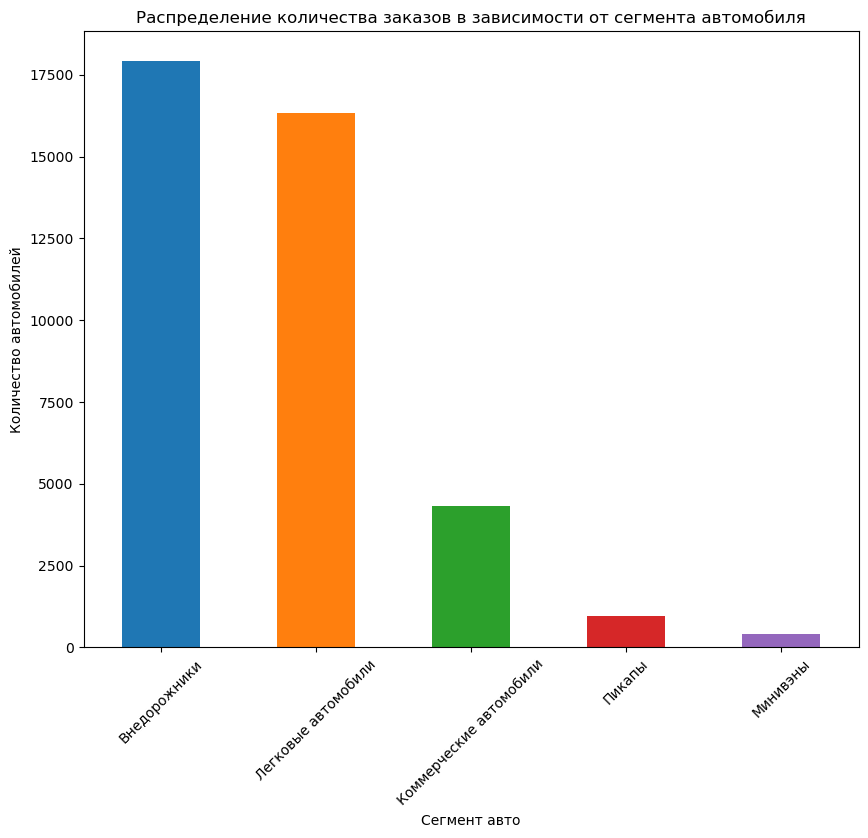

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
df['segmentation'].value_counts().plot(kind='bar', color=mcolors.TABLEAU_COLORS)

# задаем название графика
plt.title(label='Распределение количества заказов в зависимости от сегмента автомобиля')

# задаем подпись оси X
plt.xlabel('Сегмент авто')

# поворачиваем подписи значений по оси X
plt.xticks(rotation=45)

# задаем подпись оси X
plt.ylabel('Количество автомобилей')

# отражаем получившийся график
plt.show();

Здесь наши ожидания не совсем совпали с реальностью, и на первом месте оказались внедорожники (**около 17500** заказов). А на втором месте легковушки (**около 16000** заказов). Меньше всего покупают пикапов и минивэнов. Но, не будем забывать, что мы считали количество заказов, а не общее число автомобилей. А ведь у нас есть заказы с большим количеством авто, которые могут "сместить" полученную нами статистику.

Рассмотрим так же разбиение по сегментам в разрезе общего числа автомобилей.

In [ ]:
# создаем сводную таблицу, в которой посчитаем сумму по столбцу quantity
# для каждого уникального значения столбца segmentation
segment_pivot = df.pivot_table(index='segmentation',
                               values='quantity',
                               aggfunc=sum).reset_index()

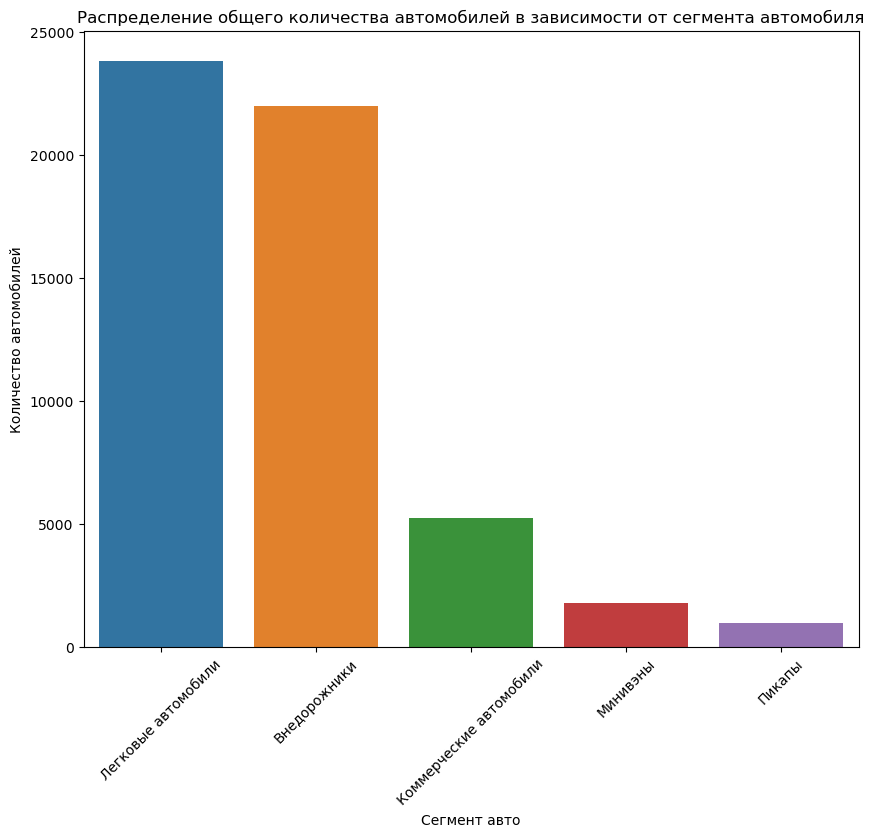

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=segment_pivot,
            x='segmentation',
            y='quantity',
            orient='v',
            order=segment_pivot.sort_values('quantity', ascending=False).segmentation)

# задаем название графика
plt.title(label='Распределение общего количества автомобилей в зависимости от сегмента автомобиля')

# задаем подпись оси X
plt.xlabel('Сегмент авто')

# поворачиваем подписи значений по оси X
plt.xticks(rotation=45)

# задаем подпись оси X
plt.ylabel('Количество автомобилей')

# отражаем получившийся график
plt.show();

Рассмотрев разбиение на сегменты по общему числу автомобилей, видим, что легковые авто перевесили внедорожники. Значит, в крупных заказах легковых автомобилей больше.

Проанализируем так же распределение числа заказов в зависимости от класса автомобиля.

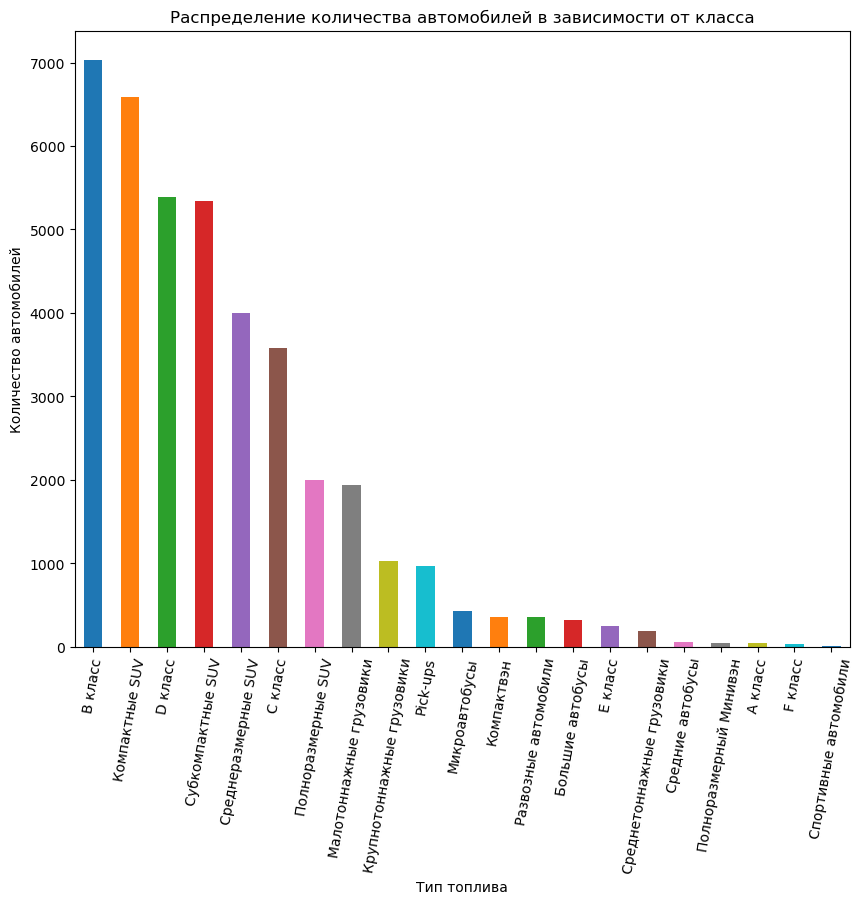

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
df['class'].value_counts().plot(kind='bar', color=mcolors.TABLEAU_COLORS)

# задаем название графика
plt.title(label='Распределение количества автомобилей в зависимости от класса')

# задаем подпись оси X
plt.xlabel('Тип топлива')

# поворачиваем подписи значений по оси X
plt.xticks(rotation=80)

# задаем подпись оси X
plt.ylabel('Количество автомобилей')

# отражаем получившийся график
plt.show();

Самые популярные автомобили на рынке - это автомобили **класса B**, к которым можно отнести, например, Renault Logan, Hyundai Solaris, Volkswagen Polo, Skoda Rapid и другие «народные» автомобили. Также популярны **компактные SUV** или кроссоверы, такие как, например, Nissan Juke, Renault Captur, Volvo XC40 и т.д. Чуть менее популярны автомобили **D класса и субкомпактные SUV**. В целом, стоит отметить, что **SUV** разных размеров занимают уверенные позиции на рынке и входят в первые ряды по популярности.

Меньше всего приобретали **средние автобусы, полноразмерные минивэны, автомобили A и F классов** и совсем минимальное количество - это **спортивные автомобили**.

In [ ]:
# создаем сводную таблицу, в которой посчитаем сумму по столбцу quantity
# для каждого уникального значения столбца segmentation
class_pivot = df.pivot_table(index='class',
                             values='quantity',
                             aggfunc=sum).reset_index()

class_pivot.columns = ['class_auto', 'quantity']

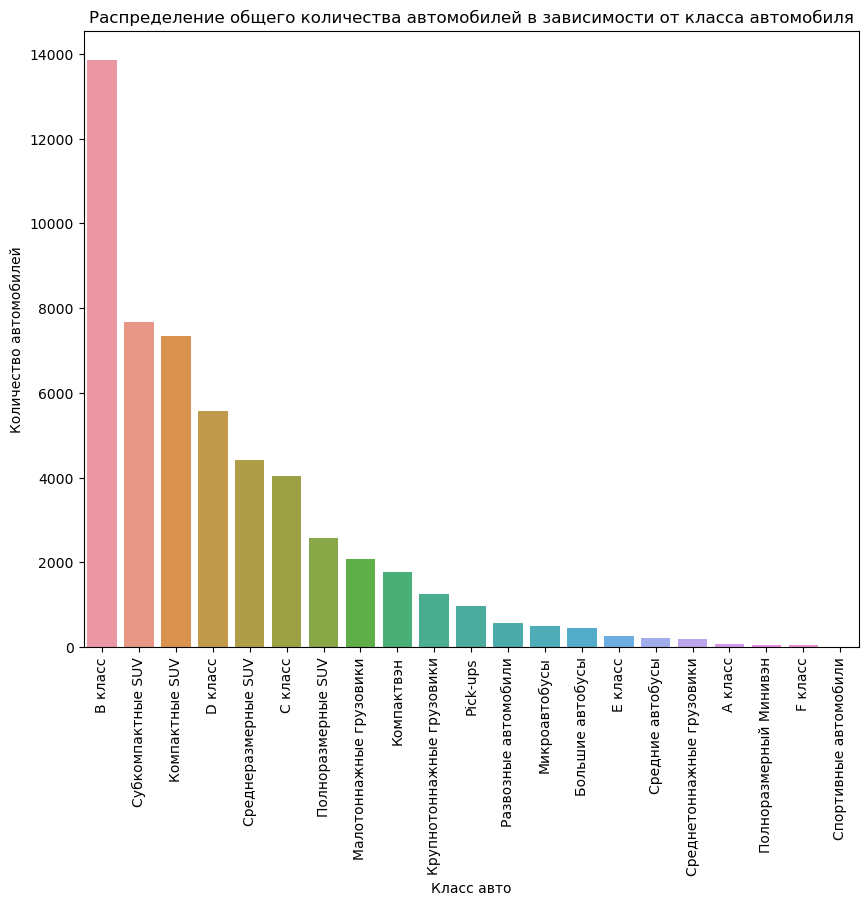

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=class_pivot,
            x='class_auto',
            y='quantity',
            orient='v',
            order=class_pivot.sort_values('quantity', ascending=False).class_auto)

# задаем название графика
plt.title(label='Распределение общего количества автомобилей в зависимости от класса автомобиля')

# задаем подпись оси X
plt.xlabel('Класс авто')

# поворачиваем подписи значений по оси X
plt.xticks(rotation=90)

# задаем подпись оси X
plt.ylabel('Количество автомобилей')

# отражаем получившийся график
plt.show();

По общему количеству проданных автомобилей **B класс** занимает уверенную лидирующую позицию. Примерно в два раза меньше **субкомпактных SUV** и **компактных SUV**, далее идут **D класс** и **среднеразмерные SUV**. Стоит отметить, что **субкомпактные SUV** при расчете по общему числу проданных автомобилей по сравнению с числом заказов, сдвинулись с 4-го места на 2-ое. Значит, в крупных заказах много автомобилей **B класса** и **субкомпактных SUV**.

<div style="border:solid green 2px; padding:20px">
    
В ходе исследовательского анализа данных определили, что:
    
* большинство автомобилей в датасете выпущены **в 2019 году**;
    
    
* основная часть проданных автомобилей имеют двигатели, объемом около **1.6-2.4 л.**;

    
* чаще всего заказы **единичные**, но есть так же и очень большие заказы на малолитражные простые автомобили, которые приобретаются, скорее всего, для коммерческих целей;
    
    
* медианная стоимость одного автомобиля - **24282\$**, большая часть авто имеет стоимость до **60000\$**, но есть так же и более дорогие автомобили;
    
    
* подавляющее большинство купленных автомобилей имеют **бензиновый двигатель**, **полный или передний привод**;
    
    
* чаще всего покупают **внедорожники и легковые автомобили класса B**, а так же популярны автомобили **класса SUV**.    
    
</div>   

# Часть 3. Анализируем рынок

<a id='chapter_9'></a>Анализ рынка начнем с выделения топовых марок на рынке Казахстана. Сначала определим топ-10 марок в натуральном выражении (т.е. в количестве купленных автомобилей). Создадим сводную таблицу по столбцу `brand_name` и посчитаем сумму значений в столбце `quantity`.

In [ ]:
# создаем сводную таблицу по столбцу brand_name и находим сумму по столбцу qunatity
brand_name_top = (df.pivot_table(index='brand_name', values='quantity', aggfunc='sum')
                    .reset_index() # сбрасываем индексы
                    .sort_values('quantity', ascending=False) # сортируем значения по убыванию
                    .head(10)) # оставляем первые 10 строк

Для наглядности построим столбчатый график по полученной таблице.

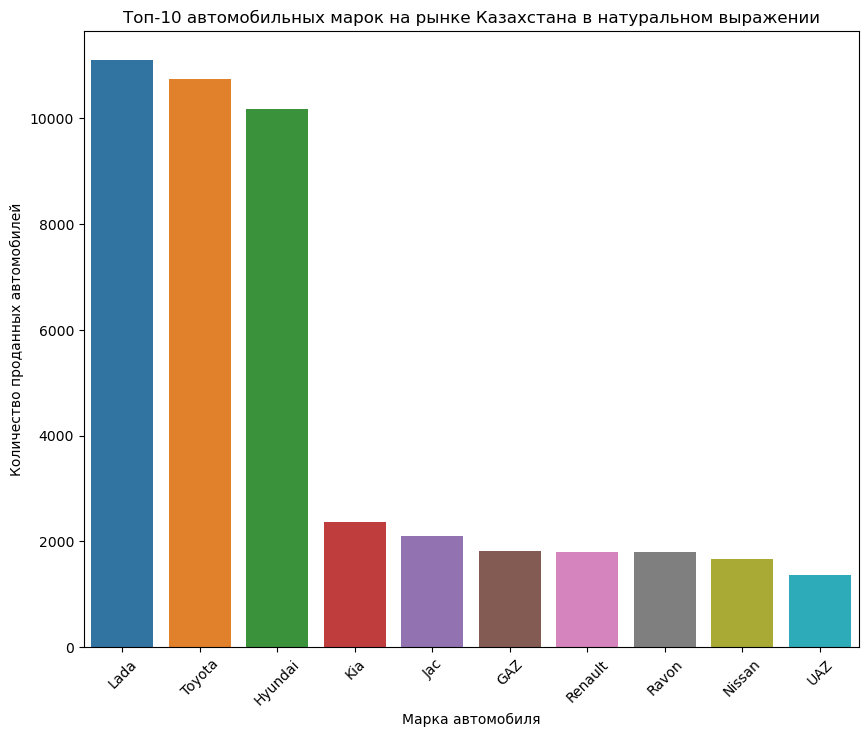

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=brand_name_top,
            x='brand_name',
            y='quantity',
            orient='v',
            order=brand_name_top.sort_values('quantity', ascending=False).brand_name)

# задаем название графика
plt.title(label='Топ-10 автомобильных марок на рынке Казахстана в натуральном выражении')

# задаем подпись оси X
plt.xlabel('Марка автомобиля')

# поворачиваем подписи значений по оси X
plt.xticks(rotation=45)

# задаем подпись оси X
plt.ylabel('Количество проданных автомобилей')

# отражаем получившийся график
plt.show();

С явным отрывом тройку лидеров занимают компании **Lada, Toyota и Hyundai** - продажи автомобилей этих марок в несколько раз превышают остальные. За анализируемый период автомобилей этих марок было продано более **30000**.

Теперь определим топ-10 марок в денежном выражении, т.е. по сумме заказов.

In [ ]:
# создаем сводную таблицу по столбцу brand_name и находим сумму по столбцу sale, USD
brand_name_top_sale = (df.pivot_table(index='brand_name', values='sale, USD', aggfunc='sum')
                         .reset_index() # сбрасываем индексы
                         .sort_values('sale, USD', ascending=False) # сортируем значения по убыванию
                         .head(10)) # оставляем первые 10 строк

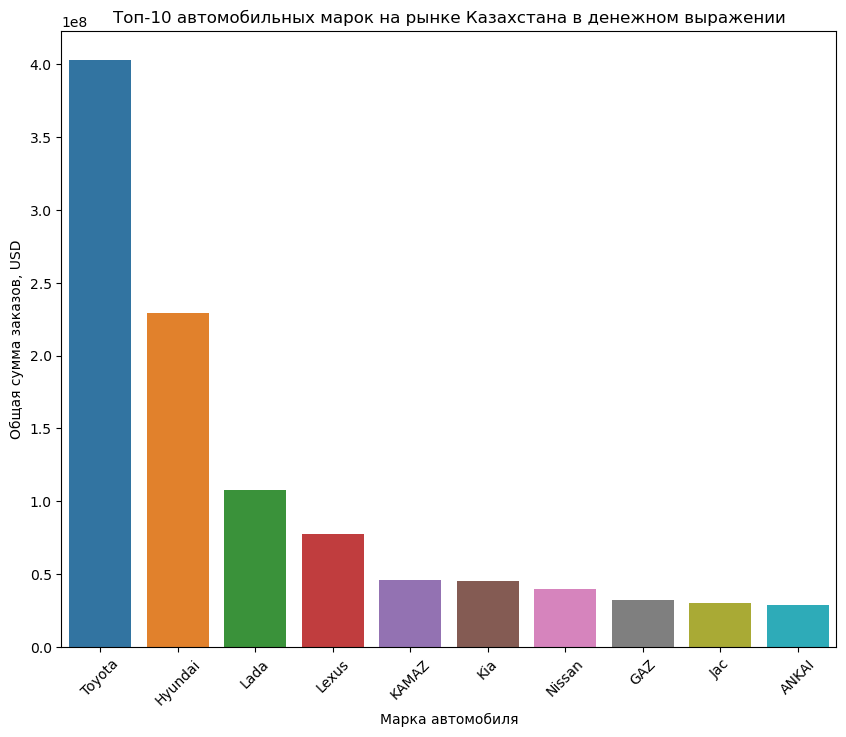

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=brand_name_top_sale,
            x='brand_name',
            y='sale, USD',
            orient='v',
            order=brand_name_top_sale.sort_values('sale, USD', ascending=False).brand_name)

# задаем название графика
plt.title(label='Топ-10 автомобильных марок на рынке Казахстана в денежном выражении')

# задаем подпись оси X
plt.xlabel('Марка автомобиля')

# поворачиваем подписи значений по оси X
plt.xticks(rotation=45)

# задаем подпись оси X
plt.ylabel('Общая сумма заказов, USD')

# отражаем получившийся график
plt.show();

В денежном выражении тройка лидеров осталась неизменной, однако на первое место вырвалась **Toyota**. За анализируемый период автомобилей марки **Toyota** было продано на общую сумму **более 400 млн. долларов**. Второе место занимает **Hyundai** и проаджи за анализируемый период составили около **230 млн.долларов**. А продаж автомобилей **LADA** составляют всего около **100 млн.долларов**. Такая тенденция вполне логична, ведь ценовой сегмент у автомобилей этих марок разный.

Здесь же видим, что 4-е место занимает **Lexus**, хотя, он даже не вошел в топ-10 марок в натуральном выражении. Это тоже объяснимо, ведь это люксовый бренд, который покупают в меньшем количестве, но стоит он дороже.

<a id='chapter_10'></a> Теперь изучим общие продажи на рынке Казахстана всех марок в денежном и натуральном выражении.

In [ ]:
# находим сумму по столбцу sale, USD
print(f'Общая сумма продаж всех марок в Казахстане\
за период с января по сентябрь 2019 года - {round(sum(df["sale, USD"]))} USD')

# находим сумму по столбцу quantity
print(f'Общая сумма проданных авто всех марок в Казахстане \
за период с января по сентябрь 2019 года - {sum(df["quantity"])} автомобилей')

Общая сумма продаж всех марок в Казахстанеза период с января по сентябрь 2019 года - 1349158968 USD
Общая сумма проданных авто всех марок в Казахстане за период с января по сентябрь 2019 года - 53880 автомобилей


Определили, что общая сумма продаж всех марок за анализируемый период составила **более 1.3 млрд. долларов**. А в натуральном выражении это **53880 автомобилей**.

<a id='chapter_11'></a>Проанализируем динамику продаж помесячно. Так же в денежном и натуральном выражении.

In [ ]:
# создаем сводную таблицу продаж по месяцам в денежном выражении
sales_total_month = df.pivot_table(index='date',
                                   values='sale, USD',
                                   aggfunc='sum').reset_index()

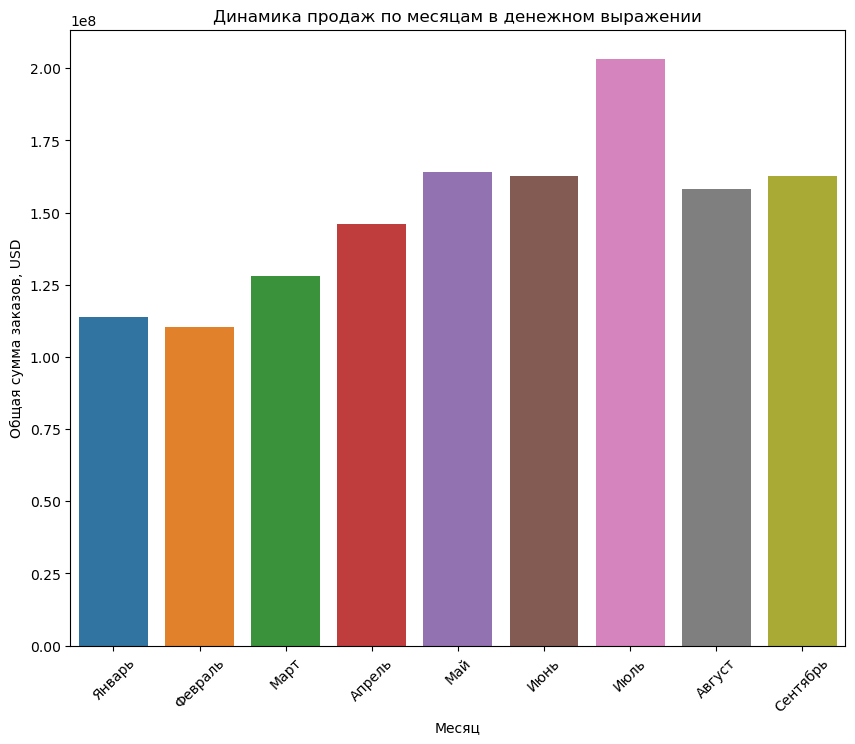

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=sales_total_month,
            x='date',
            y='sale, USD',
            orient='v')

# задаем название графика
plt.title(label='Динамика продаж по месяцам в денежном выражении')

# задаем подпись оси X
plt.xlabel('Месяц')

labels = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь']

# поворачиваем подписи значений по оси X
plt.xticks(np.arange(9), labels, rotation=45)

# задаем подпись оси X
plt.ylabel('Общая сумма заказов, USD')

# отражаем получившийся график
plt.show();

Наименее прибыльными месяцами 2019 года являются **январь и февраль**, возможно, это связано с новогодними праздниками и низкой покупательной способностью в этот период. Самым прибыльным месяцем оказался **июль**, общая сумма проданных авто составила более **200 млн.долларов**. Тогда как в январе и феврале сумма была почти в два раза меньше.

Проанализируем продажи в натуральном выражении, чтобы определить с чем связаны более высокие продажи в июле.

In [ ]:
# создаем сводную таблицу продаж по месяцам в натуральном выражении
cars_total_month = df.pivot_table(index='date',
                                  values='quantity',
                                  aggfunc='sum').reset_index()


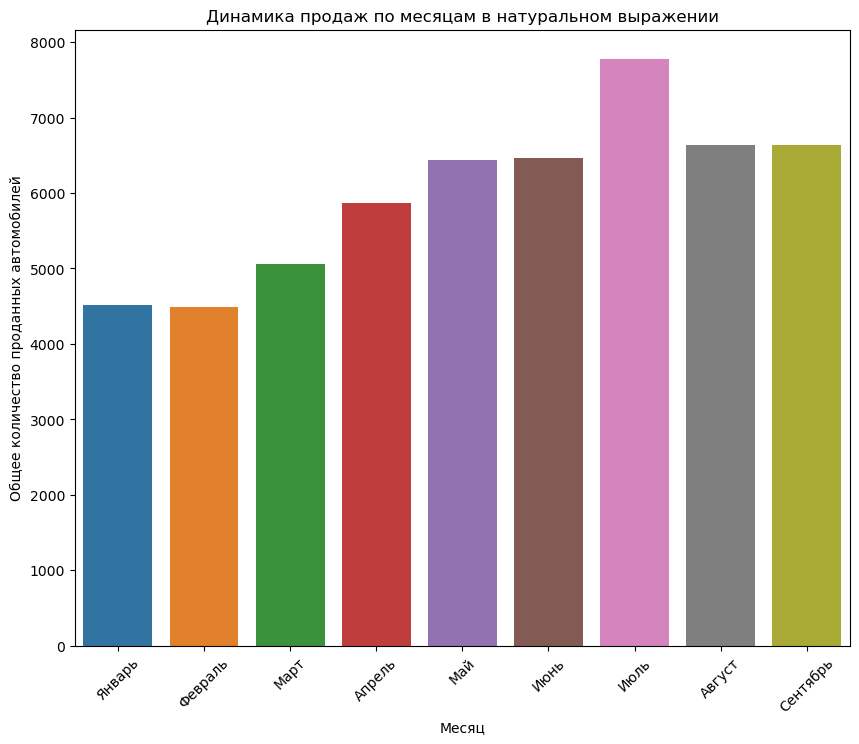

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=cars_total_month,
            x='date',
            y='quantity',
            orient='v')

# задаем название графика
plt.title(label='Динамика продаж по месяцам в натуральном выражении')

# задаем подпись оси X
plt.xlabel('Месяц')

# поворачиваем подписи значений по оси X
plt.xticks(np.arange(9), labels, rotation=45)

# задаем подпись оси X
plt.ylabel('Общее количество проданных автомобилей')

# отражаем получившийся график
plt.show();

В натуральном выражении наблюдается такая же картина - меньше всего автомобилей было приобретено в **январе и феврале**, а больше всего в **июле**. Возможно, на летние месяцы приходятся большие заказы, которые мы выявили ранее.

<a id='chapter_12'></a> Теперь проанализируем продажи по категориям - начнем с типа топлива. Скорее всего бензиновых автомобилей каждый месяц продается больше всего.

In [ ]:
# создаем сводную таблицу по типам топлива и считаем продажи в каждый месяц
sales_month_fuel = (df.query('type_of_fuel != "0"')
                      .pivot_table(index='date',
                                   columns='type_of_fuel',
                                   values='sale, USD',
                                   aggfunc='sum'))

# создаем сводную таблицу по типам топлива и считаем продажи в каждый месяц
cars_month_fuel = (df.query('type_of_fuel != "0"')
                     .pivot_table(index='date',
                                  columns='type_of_fuel',
                                  values='quantity',
                                  aggfunc='sum'))

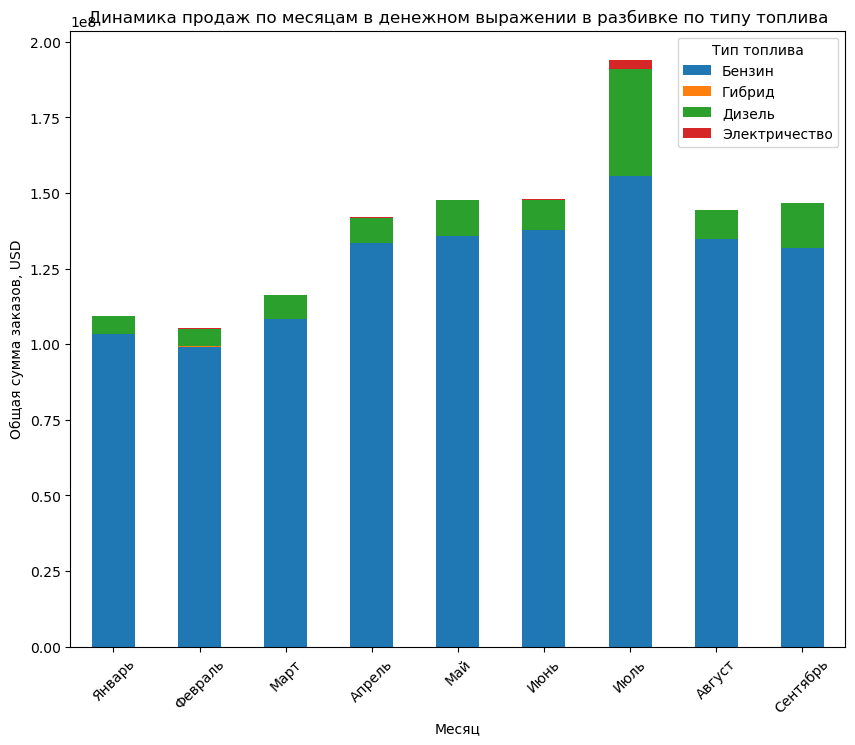

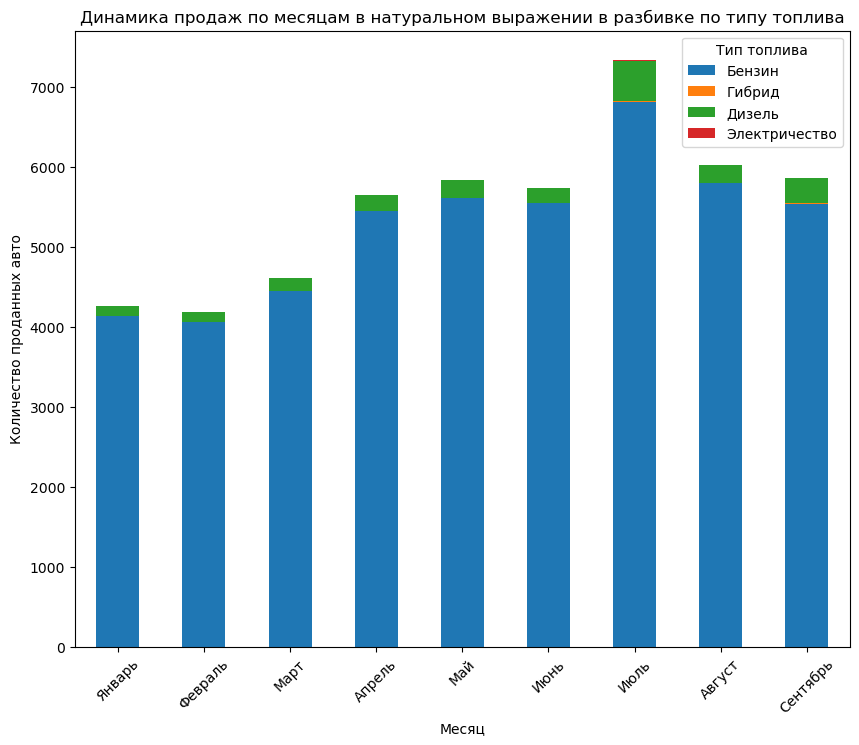

In [ ]:
# строим столбчатый график
sales_month_fuel.drop(columns='0').plot(kind='bar', stacked=True, figsize=(10,8))

# задаем название графика
plt.title(label='Динамика продаж по месяцам в денежном выражении в разбивке по типу топлива')

# задаем подпись оси X
plt.xlabel('Месяц')

# поворачиваем подписи значений по оси X
plt.xticks(np.arange(9), labels, rotation=45)

# задаем подпись оси X
plt.ylabel('Общая сумма заказов, USD')

# переименовываем легенду
plt.legend(title='Тип топлива')

# отражаем получившийся график
plt.show()

# строим столбчатый график
cars_month_fuel.drop(columns='0').plot(kind='bar', stacked=True, figsize=(10,8))

# задаем название графика
plt.title(label='Динамика продаж по месяцам в натуральном выражении в разбивке по типу топлива')

# задаем подпись оси X
plt.xlabel('Месяц')

# поворачиваем подписи значений по оси X
plt.xticks(np.arange(9), labels, rotation=45)

# задаем подпись оси X
plt.ylabel('Количество проданных авто')

# переименовываем легенду
plt.legend(title='Тип топлива')

# отражаем получившийся график
plt.show();

Как мы и предполагали, в каждый месяц бензиновых автомобилей продается подавляющее большинство. В июле автомобилей со всеми типами двигателей продавалось наибольшее количество. В некоторые месяца есть единичные продажи электрических и гибридных авто.

Рассмотрим теперь продажи в разбивке по классу автомобилей. Т.к. классов автомобилей много, то для лучшего восприятия построим тепловую карту.

In [ ]:
# создаем сводную таблицу по классу автомобилей и считаем продажи в каждый месяц
sales_month_class = (df.pivot_table(index='date',
                                    columns='class',
                                    values='sale, USD',
                                    aggfunc='sum'))

# создаем сводную таблицу по классу автомобилей и считаем продажи в каждый месяц
cars_month_class = (df.pivot_table(index='date',
                                    columns='class',
                                    values='quantity',
                                    aggfunc='sum'))

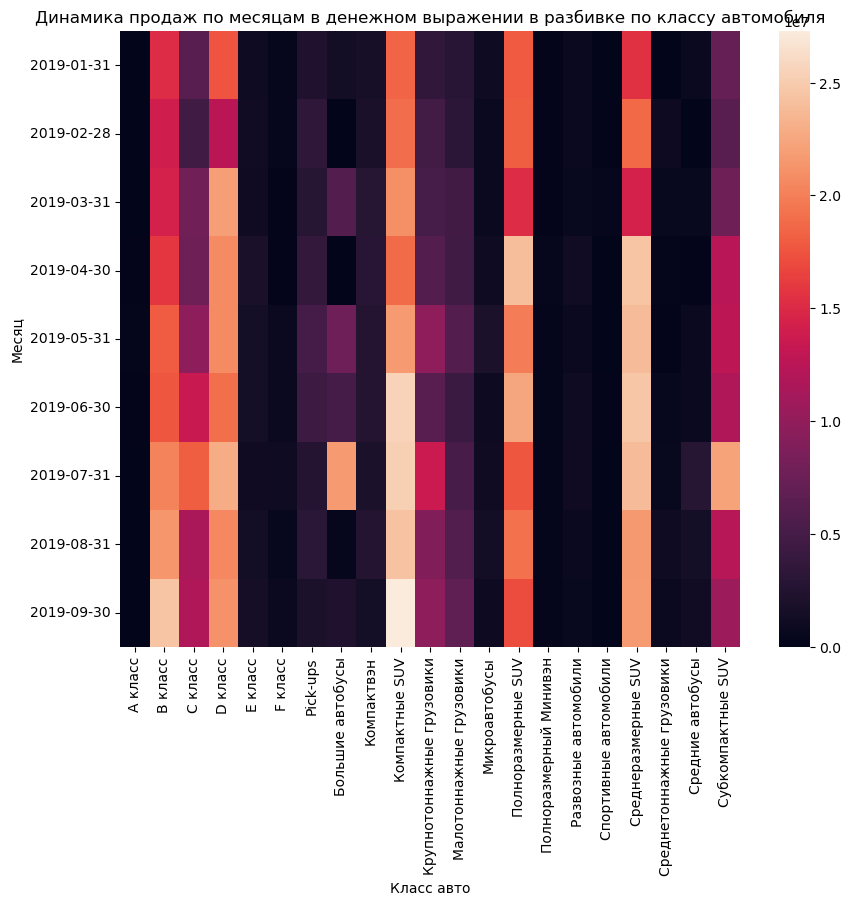

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим тепловую карту
sns.heatmap(data=sales_month_class)

# задаем название графика
plt.title(label='Динамика продаж по месяцам в денежном выражении в разбивке по классу автомобиля')

# задаем подпись оси X
plt.xlabel('Класс авто')

# задаем подпись оси X
plt.ylabel('Месяц')

# отражаем получившийся график
plt.show();

В денежном выражении в динамике по месяцам в каждый месяц выделяются **компактные SUV**, **Среднеразмерные SUV** и **полноразмерные SUV**, а так же автомобили **B и D классов**. Эти авто в течение всего анализируемого периода продавались лучше всего.

Построим такую же тепловую карту, но в натуральном выражении.

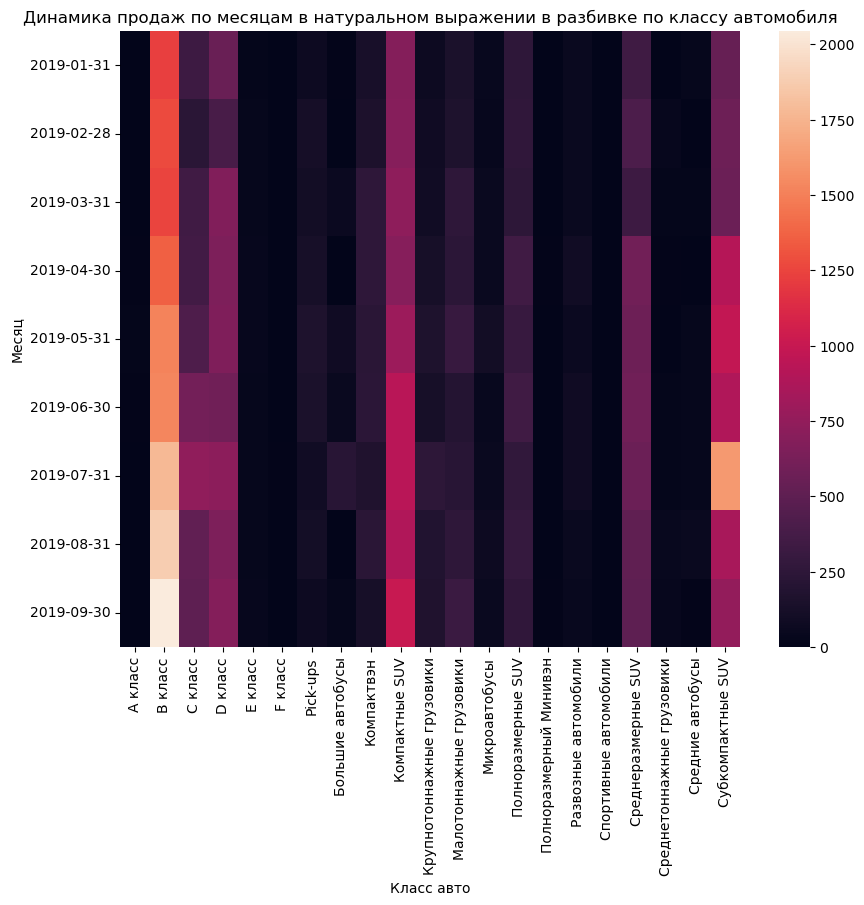

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим тепловую карту
sns.heatmap(data=cars_month_class)

# задаем название графика
plt.title(label='Динамика продаж по месяцам в натуральном выражении в разбивке по классу автомобиля')

# задаем подпись оси X
plt.xlabel('Класс авто')

# задаем подпись оси X
plt.ylabel('Месяц')

# отражаем получившийся график
plt.show();

В натуральном выражении во все месяцы больше всего продавалось автомобилей **B класса**. **Компактных и субкомпактных SUV** немного меньше и еще меньше **D класс** и **Среднеразмерные SUV**. Такую разницу в динамике продаж в денежном и натуральном выражении можно объяснить тем, что автомобилей **класса B** продавалось больше, но стоят они дешевле, чем, например, **SUV**.

Рассмотрим помесячную динамику продаж в разбивке по сегментам авто.

In [ ]:
# создаем сводную таблицу по сегменту автомобилей и считаем продажи в каждый месяц
sales_month_segment = (df.pivot_table(index='date',
                                      columns='segmentation',
                                      values='sale, USD',
                                      aggfunc='sum'))

# создаем сводную таблицу по сегменту автомобилей и считаем количество проданных авто в каждый месяц
cars_month_segment = (df.pivot_table(index='date',
                                      columns='segmentation',
                                      values='quantity',
                                      aggfunc='sum'))

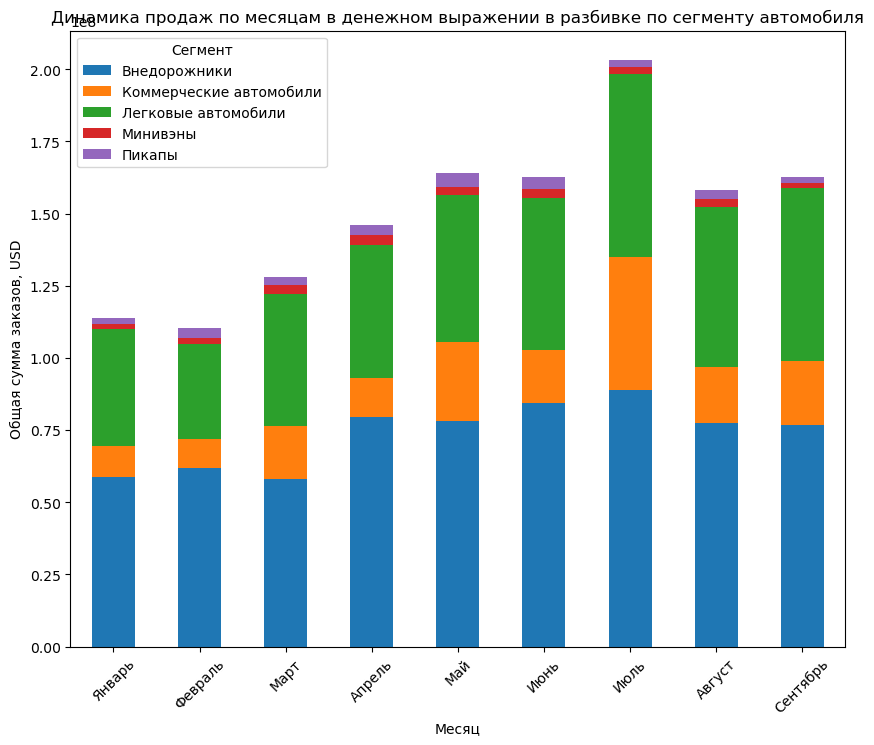

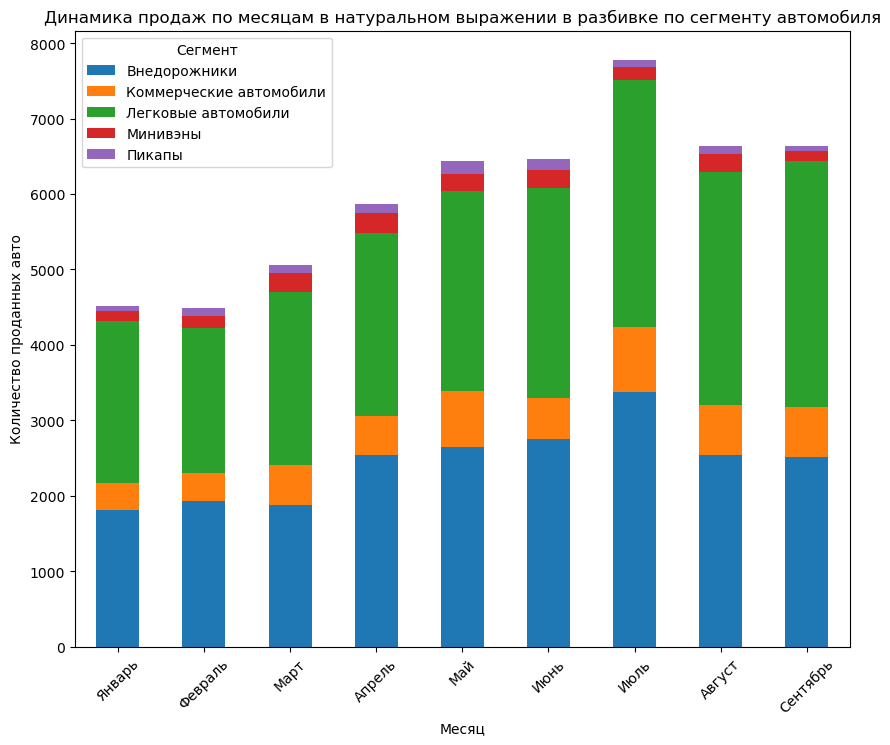

In [ ]:
# строим столбчатый график
sales_month_segment.plot(kind='bar', stacked=True, figsize=(10,8))

# задаем название графика
plt.title(label='Динамика продаж по месяцам в денежном выражении в разбивке по сегменту автомобиля')

# задаем подпись оси X
plt.xlabel('Месяц')

# поворачиваем подписи значений по оси X
plt.xticks(np.arange(9), labels, rotation=45)

# задаем подпись оси X
plt.ylabel('Общая сумма заказов, USD')

# переименовываем легенду
plt.legend(title='Сегмент')

# отражаем получившийся график
plt.show()

# строим столбчатый график
cars_month_segment.plot(kind='bar', stacked=True, figsize=(10,8))

# задаем название графика
plt.title(label='Динамика продаж по месяцам в натуральном выражении в разбивке по сегменту автомобиля')

# задаем подпись оси X
plt.xlabel('Месяц')

# поворачиваем подписи значений по оси X
plt.xticks(np.arange(9), labels, rotation=45)

# задаем подпись оси X
plt.ylabel('Количество проданных авто')

# переименовываем легенду
plt.legend(title='Сегмент')

# отражаем получившийся график
plt.show();

По графикам видим, что во все месяца легковые автомобили и внедорожники продавались больше всего (в натуральном выражении). Минивены, пикапы и коммерческие автомобили продавались во много раз меньше.

<a id='chapter_13'></a>Проанализируем продажи по регионам и выделим самые "продающие" регионы.

In [ ]:
# создаем сводную таблицу по региону продажи и считаем продажи в каждом регионе
sales_region = (df.pivot_table(index='sales_region',
                               values='sale, USD',
                               aggfunc='sum')
                  .reset_index()
                  .sort_values('sale, USD', ascending=False))

# создаем сводную таблицу по региону продажи и считаем продажи в каждом регионе
cars_region = (df.pivot_table(index='sales_region',
                              values='quantity',
                              aggfunc='sum')
                  .reset_index()
                  .sort_values('quantity', ascending=False))

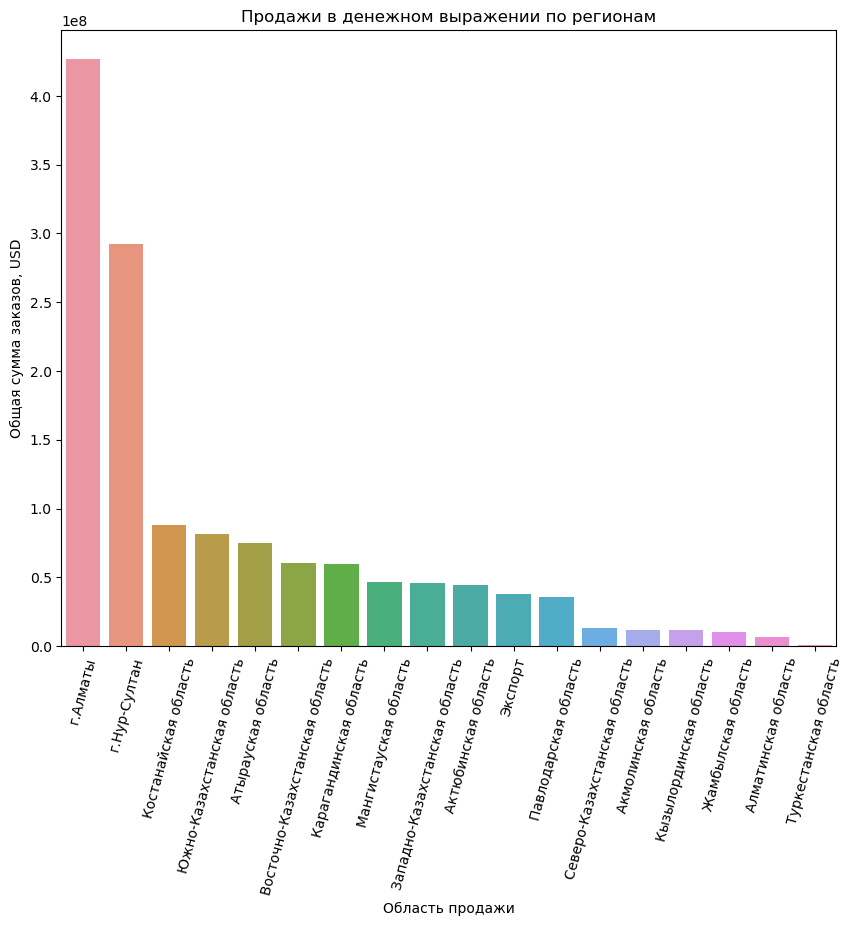

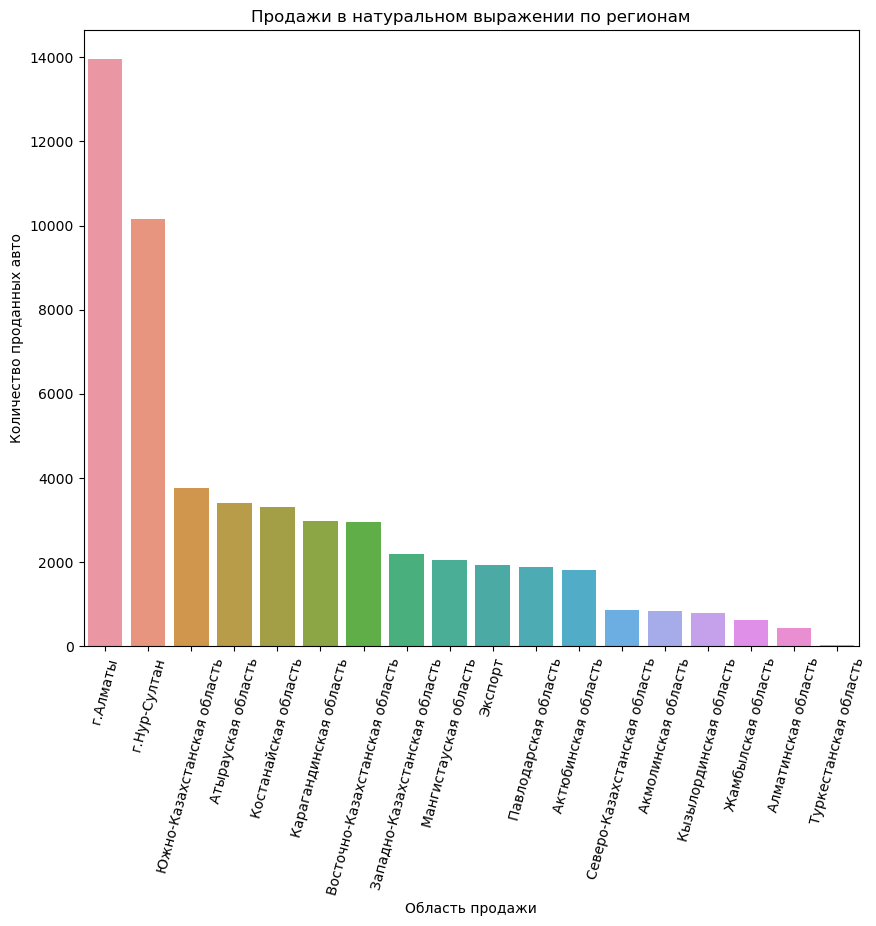

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=sales_region, x='sales_region', y='sale, USD')

# задаем название графика
plt.title(label='Продажи в денежном выражении по регионам')

# задаем подпись оси X
plt.xlabel('Область продажи')

# поворачиваем подписи по оси X
plt.xticks(rotation=75)

# задаем подпись оси X
plt.ylabel('Общая сумма заказов, USD')

# отражаем получившийся график
plt.show()

# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=cars_region, x='sales_region', y='quantity')

# задаем название графика
plt.title(label='Продажи в натуральном выражении по регионам')

# задаем подпись оси X
plt.xlabel('Область продажи')

# поворачиваем подписи по оси X
plt.xticks(rotation=75)

# задаем подпись оси X
plt.ylabel('Количество проданных авто')

# отражаем получившийся график
plt.show();

Регионы-лидеры по продажам - это города **Алматы** и **Нур-Султан** (но, здесь же стоит отметить, что оба этих города относятся к Акмолинской области). В этих двух городах было продано максимальное количество автомобилей (суммарно около 25 тысяч). Такая тенденция вполне объяснима, ведь это два наиболее крупных города в Казахстане.

<a id='chapter_14'></a>Теперь определим топ-10 дилеров, продающих больше всего авто (в денежном и натуральном выражении).

In [ ]:
# создаем сводную таблицу по дилеру и считаем продажи у каждого дилера
sales_company = (df.pivot_table(index='company',
                                values='sale, USD',
                                aggfunc='sum')
                   .reset_index()
                   .sort_values('sale, USD', ascending=False)
                   .head(10))

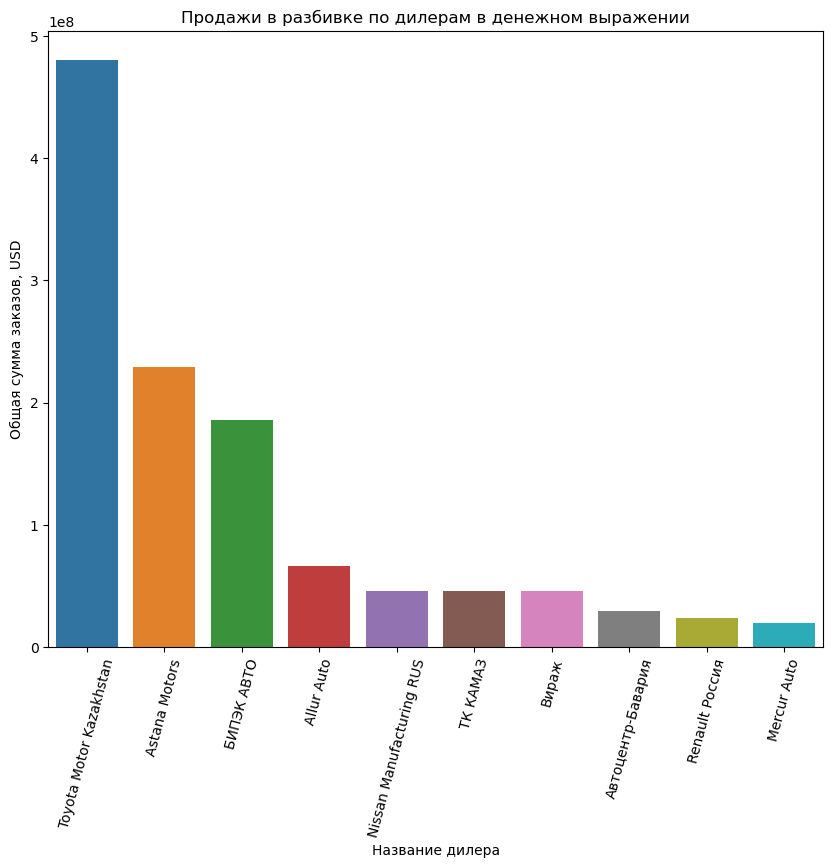

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=sales_company, x='company', y='sale, USD')

# задаем название графика
plt.title(label='Продажи в разбивке по дилерам в денежном выражении')

# задаем подпись оси X
plt.xlabel('Название дилера')

# поворачиваем подписи по оси X
plt.xticks(rotation=75)

# задаем подпись оси X
plt.ylabel('Общая сумма заказов, USD')

# отражаем получившийся график
plt.show();

В денежном выражении лидером по продажам является дилер **Toyota Motor Kazakhstan**, за анализируемый период его продажи составили **около 480 млн.** долларов. На втором и третьем месте с разницей почти в два раза оказались **Astana Motors** и **БИПЭК АВТО**, их продажи находятся в пределах **200 млн. долларов**.

Посмотрим как изменится ситуация по продажам в натуральном выражении.

In [ ]:
# создаем сводную таблицу по дилеру и считаем количество проданных авто у каждого дилера
cars_company = (df.pivot_table(index='company',
                               values='quantity',
                               aggfunc='sum')
                  .reset_index()
                  .sort_values('quantity', ascending=False)
                  .head(10))

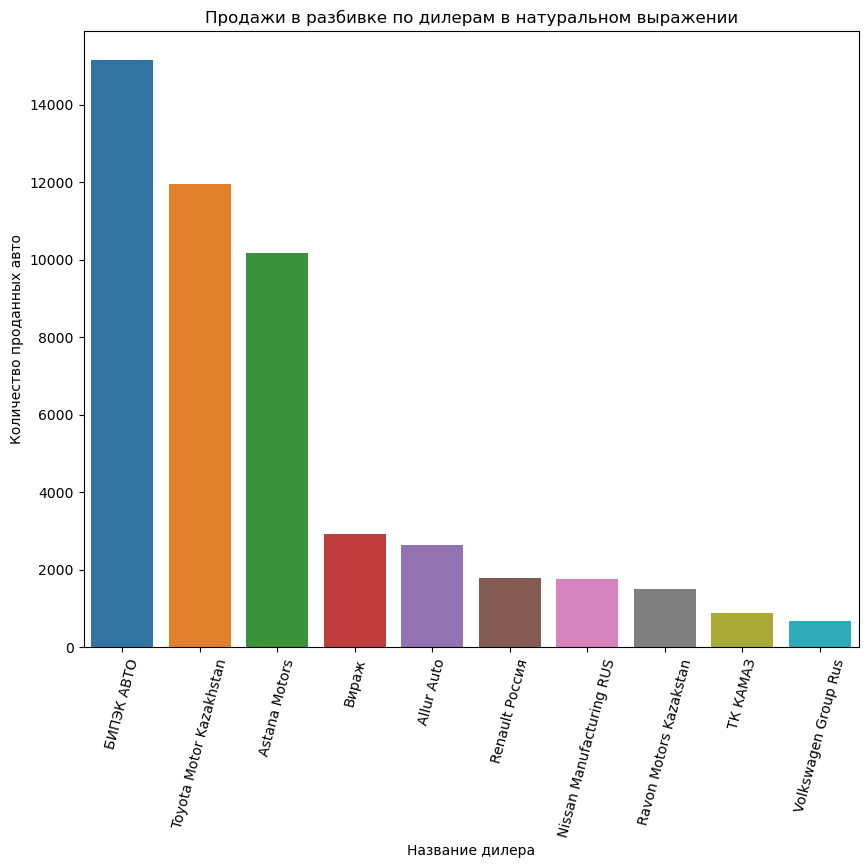

In [ ]:
# задаем размер графика
plt.figure(figsize=(10,8))

# строим столбчатый график
sns.barplot(data=cars_company, x='company', y='quantity')

# задаем название графика
plt.title(label='Продажи в разбивке по дилерам в натуральном выражении')

# задаем подпись оси X
plt.xlabel('Название дилера')

# поворачиваем подписи по оси X
plt.xticks(rotation=75)

# задаем подпись оси X
plt.ylabel('Количество проданных авто')

# отражаем получившийся график
plt.show();

В натуральном выражении на первое место вышел **БИПЭК АВТО**, количество проданных авто за анализируемый период составляет около **15 тысяч**. На втором месте оказались **Toyota Motor Kazakhstan** и **12 тысяч** проданных авто. На третьем месте **Astana Motors**, продавшая **около 10 тысяч** автомобилей. Значит, **БИПЭК АВТО** продает более дешевые автомобили, чем **Toyota Motor Kazakhstan**, а **Astana Motors** наоборот более дорогие.

<a id='chapter_15'></a>Определим самые продаваемые автомобили у этих трех дилеров. Выделим **топ-5** самых продаваемых модели в каждом центре.

In [ ]:
# для компании БИПЭК АВТО определяем количество заказов каждого бренда и модели
df.query('company == "БИПЭК АВТО"')[['brand_name','model']].value_counts().head(5)

brand_name  model 
Lada        Vesta     627
            Granta    463
            XRAY      344
            Largus    266
            4x4       251
dtype: int64

Для дилера **БИПЭК АВТО** определили, что самые часто покупаемые модели - это Lada Vesta, Lada Granta, Lada XRAY, Lada Largus и Lada 4x4.

In [ ]:
# для компании Toyota Motor Kazakhstan определяем количество заказов каждого бренда и модели
df.query('company == "Toyota Motor Kazakhstan"')[['brand_name','model']].value_counts().head()

brand_name  model   
Toyota      Camry       4853
            LC Prado    1711
            RAV4        1213
            Corolla     1089
            HILUX DC     827
dtype: int64

Для компании Toyota Motor Kazakhstan наиболее продаваемыми являются Toyota Camry,Toyota LC Prado,Toyota RAV4, Toyota Corolla и Toyota HILUX DC.

In [ ]:
# для компании Astana Motors определяем количество заказов каждого бренда и модели
df.query('company == "Astana Motors"')[['brand_name','model']].value_counts().head()

brand_name  model   
Hyundai     Tucson      3271
            Accent      2211
            Elantra     2062
            Creta       1775
            Santa Fe     639
dtype: int64

Для дилера **Astana Motors** самыми популярными являются Hyundai Tucson, Hyundai Accent, Hyundai Elantra, Hyundai Creta, Hyundai Santa Fe.

<a id='chapter_15'></a>

<div style="border:solid green 2px; padding:20px">

В ходе анализа рынка определили трех явных лидеров-брендов по продаже авто в Казахстане - это **Lada, Toyota и Hyundai** - продажи автомобилей этих марок в несколько раз превышают остальные. За анализируемый период автомобилей этих марок было продано более **30000**. Наибольшее количество проданных автомобилей - это автомобили компании **Lada**, однако, самые дорогие из тройки лидеров - это **Toyota**.
    
Определили, что общая сумма продаж всех марок за анализируемый период составила **более 1.3 млрд. долларов**. А в натуральном выражении это **53880 автомобилей**.

Анализ динамики продаж по месяцам показал, что наименее прибыльными месяцами 2019 года являются **январь и февраль**, возможно, это связано с новогодними праздниками и низкой покупательной способностью в этот период. Самым прибыльным месяцем оказался **июль**, общая сумма заказов составила более **200 млн.долларов**. Тогда как в январе и феврале сумма была почти в два раза меньше.
    
Анализ динамики продаж по месяцам разрезе типов двигателей позволил выявить, что **бензиновых автомобилей** продается больше всего. В некоторые месяцы есть единичные продажи электрических и гибридных авто. В разрезе сегментов авто увидели, что во все месяца легковые автомобили и внедорожники продавались больше всего. Минивены, пикапы и коммерческие автомобили продавались во много раз меньше.
    
В динамике по месяцам в разбивке по классу авто выделяются **компактные SUV**, **Среднеразмерные SUV** и **полноразмерные SUV**, а так же автомобили **B и D классов**. Эти авто в течение всего анализируемого периода продавались лучше всего (в денежном выражении). В натуральном выражении во все месяцы больше всего продавалось автомобилей **B класса**. **Компактных и субкомпактных SUV** немного меньше и еще меньше **D класс** и **Среднеразмерные SUV**. Такую разницу в динамике продаж в денежном и натуральном выражении можно объяснить тем, что автомобилей **класса B** продавалось больше, но стоят они дешевле, чем, например, **SUV**.
    
Так же выделили регионы, в которых продавалось наибольшее количество автомобилей - это города **Алматы** и **Нур-Султан**, относящиеся к Акмолинской области. В этих двух городах было продано максимальное количество автомобилей (суммарно около **25 тысяч**). Такая тенденция вполне объяснима, ведь это два наиболее крупных города в Казахстане.
    
Проанализировав результаты продаж по дилерам определили, что в денежном выражении лидером по продажам является дилер **Toyota Motor Kazakhstan**, за анализируемый период его продажи составили **около 480 млн.** долларов. На втором и третьем месте с разницей почти в два раза меньше оказались **Astana Motors** и **БИПЭК АВТО**, их продажи находятся в пределах **200 млн. долларов**. В натуральном выражении на первое место вышел **БИПЭК АВТО**, количество проданных авто за анализируемый период составляет около **15 тысяч**. На втором месте оказались **Toyota Motor Kazakhstan** и **12 тысяч** проданных авто. На третьем месте **Astana Motors**, продавшая **около 10 тысяч** автомобилей. Значит, **БИПЭК АВТО** продает более дешевые автомобили, чем **Toyota Motor Kazakhstan**, а **Astana Motors** наоборот более дорогие.  
    
Для каждого из топ-3 дилеров определили топ-5 наиболее часто покупаемых автомобилей. Для дилера **БИПЭК АВТО** определили, что самые часто покупаемые модели - это Lada Vesta, Lada Granta, Lada XRAY, Lada Largus и Lada 4x4. Для компании Toyota Motor Kazakhstan наиболее продаваемыми являются Toyota Camry,Toyota LC Prado,Toyota RAV4, Toyota Corolla и Toyota HILUX DC. Для дилера **Astana Motors** самыми популярными являются Hyundai Tucson, Hyundai Accent, Hyundai Elantra, Hyundai Creta, Hyundai Santa Fe.

</div>